In [ ]:
!pip install patchify

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
#from patchify import patchify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Cargar imagenes**

In [ ]:
def cargar_imagenes(desde_directorio):
    imagenes = []
    for filename in os.listdir(desde_directorio):
        path = os.path.join(desde_directorio, filename)
        if os.path.isfile(path):
            imagen = cv2.imread(path)
            if imagen is not None:
                imagenes.append(imagen)
    return imagenes

In [ ]:
folder = '/content/drive/MyDrive/ArchivosColab/Imagenes_todas'
imagenes = cargar_imagenes(folder)

# **REDIMENCIONAR Y PARTICIONAR IMAGENES**


In [ ]:
#REDIMENCIONAR
imagen_resize_no =[]
for images in imagenes:
      imagen_re = cv2.resize(images, (150, 150))
      imagen_resize_no.append(imagen_re)

In [ ]:
#PARTICIONAR
# Función para imágenes en parches más pequeños
def dividir_imagenes_en_parches(lista_imagenes, tamaño_parche=(15, 15, 3), paso=15):
    parches = []
    for imagen in lista_imagenes:
        parches_imagen = patchify(imagen, tamaño_parche, step=paso)
        parches_imagen = parches_imagen.reshape(-1, tamaño_parche[0], tamaño_parche[1], tamaño_parche[2])
        parches.extend(parches_imagen)
    return parches

In [ ]:
particiones = dividir_imagenes_en_parches(imagen_resize_no)
print("Cantidad de parches de incendios generados:", len(particiones))

# **GUARDAR IMAGENES CHIQUITAS EN UN NUEVO FOLDER**

In [ ]:
# Directorio donde se guardarán los parches
folder_parches = '/content/drive/MyDrive/ArchivosColab/imagenes_parches'

# Función para guardar los parches como imágenes individuales
def guardar_parches_en_folder(parches, folder_destino):
    # Crear el directorio si no existe
    if not os.path.exists(folder_destino):
        os.makedirs(folder_destino)

    # Guardar cada parche como una imagen individual
    for i, parche in enumerate(parches):
        nombre_archivo = os.path.join(folder_destino, f'parche_{i}.jpg')
        cv2.imwrite(nombre_archivo, parche)

# Guardar los parches en el nuevo directorio
guardar_parches_en_folder(particiones, folder_parches)

print(f"Se guardaron {len(particiones)} parches en el directorio {folder_parches}")

# **Eliminacion de ruido**

In [ ]:
# abrir imagenes
 # Lista de imagenes
def cargar_imagenes(desde_directorio):
    imagenes = []
    for filename in os.listdir(desde_directorio):
        path = os.path.join(desde_directorio, filename)
        if os.path.isfile(path):
            imagen = cv2.imread(path)
            if imagen is not None:
                imagenes.append(imagen)
    return imagenes

In [ ]:
folder = '/content/drive/MyDrive/ArchivosColab/imagenes_parches'
imagenes = cargar_imagenes(folder)

In [ ]:
len(imagenes_no_incendios)

10000

# **Remover imagenes con Blanco, rojo, negro, verde y separar grises**

In [ ]:
#Funcion para detectar blanco
def detectar_blanco(image):
   # Convertir la imagen a escala de grises
   gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   # Calcular la intensidad media de los píxeles
   intensidad_media = np.mean(gris)

   if intensidad_media > 210: # umbral blanco
      return True
   else:
    return False

# Función para detectar rojo  en una imagen
def detectar_rojo(image):
    # Convertir la imagen al espacio de color HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definir los límites inferiores y superiores del rojo en HSV
    lower_red = np.array([10, 165, 165])
    upper_red = np.array([10, 255, 255])

    # Umbralizar la imagen HSV para detectar rojo
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Encontrar contornos en la máscara
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Verificar si se detectó algún contorno
    if len(contours) > 0:
        return True
    else:
        return False

def detectar_negro(image):
  # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calcular la intensidad media de los píxeles
    intensidad_media = np.mean(gris)

    if intensidad_media < 35: # umbral blanco
      return True

imagenes_con_blanco = []
imagenes_con_rojo = []
imagenes_con_negro = []
imagenes_con_blanco_rojo_negro = []
imagenes_NO_incendios = []

# Iterar sobre las imágenes
for image in imagenes_no_incendios:
    if detectar_blanco(image) and detectar_rojo(image) and detectar_negro(image):
        imagenes_con_blanco_rojo_negro.append(image)
    elif detectar_blanco(image):
        imagenes_con_blanco.append(image)
    elif detectar_rojo(image):
        imagenes_con_rojo.append(image)
    elif detectar_negro(image):
        imagenes_con_negro.append(image)
    else:
        imagenes_NO_incendios.append(image)

In [ ]:
import cv2
import numpy as np

# Función para excluir colores rojos y verdes
def excluir_rojo_verde(imagen):
    # Convertir la imagen de BGR a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos HSV para rojo y verde
    rojo_bajo = np.array([0, 70, 50])
    rojo_alto = np.array([10, 255, 255])
    verde_bajo = np.array([40, 70, 50])
    verde_alto = np.array([80, 255, 255])

    # Crear máscaras para rojo y verde
    mascara_rojo = cv2.inRange(hsv, rojo_bajo, rojo_alto)
    mascara_verde = cv2.inRange(hsv, verde_bajo, verde_alto)

    # Combinar las máscaras para excluir rojo y verde
    mascara_excluir = cv2.bitwise_or(mascara_rojo, mascara_verde)

    # Invertir la máscara para obtener lo contrario (es decir, los píxeles que no son rojos ni verdes)
    mascara_invertida = cv2.bitwise_not(mascara_excluir)

    return mascara_invertida

# Lista para almacenar imágenes con humo gris
imagenes_humo_gris = []

for imagen in imagenes_incendios:
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Definir el rango de intensidad de gris para el humo
    intensidad_minima = 100
    intensidad_maxima = 150

    # Encontrar los píxeles dentro del rango de intensidad de gris definido
    mask_gris = cv2.inRange(gris, intensidad_minima, intensidad_maxima)

    # Excluir colores rojos y verdes
    mask_excluir = excluir_rojo_verde(imagen)

    # Aplicar la máscara para excluir colores rojos y verdes
    mask_gris_excluido = cv2.bitwise_and(mask_gris, mask_excluir)

    # Contar la cantidad de píxeles dentro de la máscara de humo gris
    cantidad_pixeles_gris = cv2.countNonZero(mask_gris_excluido)

    # Si la cantidad de píxeles grises supera un umbral, consideramos que hay humo gris
    umbral_cantidad_pixeles = 100
    if cantidad_pixeles_gris > umbral_cantidad_pixeles:
        imagenes_humo_gris.append(imagen)

print("Cantidad de imágenes con humo gris encontradas:", len(imagenes_humo_gris))


Cantidad de imágenes con humo gris encontradas: 1596


In [ ]:
# Función para detectar verde en una imagen
def detectar_verde(image):
    # Convertir la imagen al espacio de color HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definir los límites inferiores y superiores del verde en HSV
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([90, 255, 255])

    # Umbralizar la imagen HSV para detectar verde
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Encontrar contornos en la máscara
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Verificar si se detectó algún contorno
    if len(contours) > 0:
        return True
    else:
        return False
# Lista para almacenar imágenes con rojo
imagenes_con_verde = []

# Iterar sobre las imágenes
for image in imagenes_incendios:
    if detectar_verde(image):
        imagenes_con_verde.append(image)

In [ ]:
imagenes_Incendios = []

# Iterar sobre las imágenes de incendios
for imagen in imagenes_incendios:
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Calcular la intensidad media de los píxeles
    intensidad_media = np.mean(gris)

    # Si la intensidad media es mayor que 30 (indicando áreas negras)
    if intensidad_media > 30:
        imagenes_Incendios.append(imagen)

print("Cantidad de imágenes de incendios con áreas negras y blancas encontradas:", len(imagenes_Incendios))


# **Extraccion de caracteristicas**

## **Promedio Total**

In [ ]:
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Suponiendo que imagenes_incendios es una lista de imágenes en formato numpy array

# Lista para almacenar los promedios de cada imagen
promedios_rgb = []
promedios_totales_rgb = [] # Lista para almacenar los promedios totales de cada imagen

# Iterar sobre cada imagen en la lista imagenes_incendios
for imagen in imagenes_incendios:
    # Obtener los valores de los componentes RGB de todos los píxeles
    valores_rgb = imagen.reshape(-1, 3)

    # Calcular el promedio de los valores RGB
    promedio_rgb = np.mean(valores_rgb, axis=0)

    # Calcular el promedio total de los tres componentes RGB
    promedio_total_rgb = np.mean(promedio_rgb)

    # Agregar el promedio de RGB a la lista de promedios
    promedios_rgb.append(promedio_rgb)

    # Agregar el promedio total de RGB a la lista de promedios totales
    promedios_totales_rgb.append(promedio_total_rgb)

# Crear un DataFrame con los promedios de RGB y el promedio total de RGB
df = pd.DataFrame(promedios_rgb, columns=['Rojo', 'Verde', 'Azul'])
df['Promedio Total RGB'] = promedios_totales_rgb

# Mostrar el DataFrame
print(df)


## **Desviación estándar de los canales de color**

In [ ]:
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Listas para almacenar los promedios de desviación estándar y los promedios totales
promedios_desviacion_std = []
promedios_totales_desviacion_std = []

# Iterar sobre cada imagen en la lista imagenes_incendios
for imagen in imagenes_incendios:
    # Dividir la imagen en sus canales de color (BGR)
    canal_b, canal_g, canal_r = cv2.split(imagen)

    # Calcular la desviación estándar para cada canal de color
    desviacion_std_b = np.std(canal_b)
    desviacion_std_g = np.std(canal_g)
    desviacion_std_r = np.std(canal_r)

    # Calcular el promedio de las desviaciones estándar de los tres canales de color
    promedio_desviaciones_std = (desviacion_std_b + desviacion_std_g + desviacion_std_r) / 3

    # Agregar el promedio de desviación estándar a la lista de promedios
    promedios_desviacion_std.append([desviacion_std_b, desviacion_std_g, desviacion_std_r])
    promedios_totales_desviacion_std.append(promedio_desviaciones_std)


df['Promedio Total Desviación Std'] = promedios_totales_desviacion_std

# Mostrar el DataFrame final
print(df)

## **Desviación estándar de los canales de color**

In [ ]:
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

# Listas para almacenar los promedios de desviación estándar y los promedios totales
promedios_desviacion_std = []
promedios_totales_desviacion_std = []

# Iterar sobre cada imagen en la lista imagenes_incendios
for imagen in imagenes_incendios:
    # Dividir la imagen en sus canales de color (BGR)
    canal_b, canal_g, canal_r = cv2.split(imagen)

    # Calcular la desviación estándar para cada canal de color
    desviacion_std_b = np.std(canal_b)
    desviacion_std_g = np.std(canal_g)
    desviacion_std_r = np.std(canal_r)

    # Calcular el promedio de las desviaciones estándar de los tres canales de color
    promedio_desviaciones_std = (desviacion_std_b + desviacion_std_g + desviacion_std_r) / 3

    # Agregar el promedio de desviación estándar a la lista de promedios
    promedios_desviacion_std.append([desviacion_std_b, desviacion_std_g, desviacion_std_r])
    promedios_totales_desviacion_std.append(promedio_desviaciones_std)


df['Promedio Total Desviación Std'] = promedios_totales_desviacion_std

# Mostrar el DataFrame final
print(df)

## **Escala en grises**

In [ ]:
def calcular_promedio_color(imagenes):
    #Calcula el promedio de color de una lista de imágenes.
    promedios_color = []
    for imagen in imagenes:
        gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        promedio = np.mean(gris)
        promedios_color.append(promedio)
    return promedios_color

# Calcular el promedio de color de las imágenes en escala de grises
promedios_color = calcular_promedio_color(imagenes_incendios)

# Crear un DataFrame con los promedios de color
df['Promedio de color']= promedios_color

# Imprimir el DataFrame
print(df)

## **Area Promedio Contornos**

In [ ]:
for imagen in imagenes_incendios:
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para binarizar la imagen
    _, thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar los contornos en la imagen original
    imagen_contornos = cv2.drawContours(imagen.copy(), contours, -1, (0, 255, 0), 2)

    # Mostrar la imagen con los contornos
    cv2_imshow(imagen_contornos)

In [ ]:
# Lista para almacenar el área total de los contornos de cada imagen
areas_contornos = []

# Iterar sobre cada imagen en la lista imagenes_incendios
for imagen in imagenes_incendios:
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para binarizar la imagen
    _, thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calcular el área total de los contornos
    area_total_contornos = 0
    for contour in contours:
        area_total_contornos += cv2.contourArea(contour)

    # Agregar el área total de los contornos a la lista de áreas
    areas_contornos.append(area_total_contornos)

df['Área total de los contornos']=areas_contornos

print(df)


### **Luminosidad**

In [ ]:

# Lista para almacenar las luminosidades promedio de cada imagen
luminosidades_promedio_por_imagen = []

# Iterar sobre cada imagen en la lista imagenes_incendios
for i, imagen in enumerate(imagenes_incendios, start=1):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Calcular la luminosidad promedio de la imagen
    luminosidad_promedio = np.mean(gris)

    # Agregar la luminosidad promedio a la lista
    luminosidades_promedio_por_imagen.append(luminosidad_promedio)


df['Luminosidad promedio']= luminosidades_promedio_por_imagen


print(df)

## **LAB**

In [ ]:
# Lista para almacenar los promedios de cada imagen
promedios_lab = []
promedios_totales_lab = [] # Lista para almacenar los promedios totales de cada imagen

# Iterar sobre cada imagen en la lista imagenes_incendios
for imagen in imagenes_incendios:
    # Convertir la imagen de BGR a LAB
    lab_imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)

    # Obtener los valores de los componentes LAB de todos los píxeles
    valores_lab = lab_imagen.reshape(-1, 3)

    # Calcular el promedio de los valores LAB
    promedio_lab = np.mean(valores_lab, axis=0)

    # Calcular el promedio total de los tres componentes LAB
    promedio_total_lab = np.mean(promedio_lab)

    # Agregar el promedio de LAB a la lista de promedios
    promedios_lab.append(promedio_lab)

    # Agregar el promedio total de LAB a la lista de promedios totales
    promedios_totales_lab.append(promedio_total_lab)

df['Promedio Total LAB'] = promedios_totales_lab

print(df)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = [
        get_pixel(img, center, x-1, y+1),
        get_pixel(img, center, x, y+1),
        get_pixel(img, center, x+1, y+1),
        get_pixel(img, center, x+1, y),
        get_pixel(img, center, x+1, y-1),
        get_pixel(img, center, x, y-1),
        get_pixel(img, center, x-1, y-1),
        get_pixel(img, center, x-1, y)
    ]

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = sum(val_ar[i] * power_val[i] for i in range(len(val_ar)))
    return val

def main():
    for imagen in imagenes_incendios:
        img_bgr = imagen
        height, width, _ = img_bgr.shape
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        img_lbp = np.zeros((height, width), np.uint8)
        for i in range(height):
            for j in range(width):
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

        hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
if __name__ == '__main__':
    main()


## **Frecuencia**

In [ ]:
import numpy as np
import cv2
import pandas as pd

def is_uniform_pattern(pattern):
    """
    Verifica si un patrón LBP es uniforme o no.
    """
    transitions = 0
    for i in range(len(pattern) - 1):
        if pattern[i] != pattern[i + 1]:
            transitions += 1
    return transitions <= 2

def count_uniform_patterns(hist_lbp):
    """
    Cuenta la frecuencia de patrones uniformes en un histograma LBP.
    Devuelve la suma de las frecuencias de patrones uniformes.
    """
    uniform_count = 0
    for i, freq in enumerate(hist_lbp):
        pattern = format(i, '08b')  # Convierte el índice a su representación binaria de 8 bits
        if is_uniform_pattern(pattern):
            uniform_count += freq  # Suma la frecuencia del patrón uniforme
    return uniform_count

# Lista para almacenar las frecuencias por imagen
frecuencias_lbp = []

# Iterar sobre cada imagen en imagenes_incendios
for imagen in imagenes_incendios:
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    hist_lbp = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    frecuencia_lbp = count_uniform_patterns(hist_lbp)

    # Agregar la frecuencia al resultado
    frecuencias_lbp.append(int(frecuencia_lbp))

# Crear un DataFrame a partir de las frecuencias
df['Frecuencia LBP']= frecuencias_lbp

# Mostrar el DataFrame
print(df)



## **Transfromada de fourier**


https://felipeagq99.medium.com/transformada-de-fourier-en-el-procesamiento-de-im%C3%A1genes-con-python-numpy-y-opencv-503dfb9f85d9

In [ ]:
import numpy as np
import cv2
import pandas as pd

# Lista para almacenar las características
mean_spectrum_list = []
std_spectrum_list = []
skewness_spectrum_list = []
kurtosis_spectrum_list = []
edge_density_list = []

# Iterar sobre cada imagen en imagenes_incendios
for imagen in imagenes_incendios:
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Transformada de Fourier en 2D
    frr = np.fft.fft2(np.float64(gray))
    frr = np.fft.fftshift(frr)

    # Calcular la magnitud del arreglo y el espectro de frecuencia en escala logarítmica
    frr_abs = np.abs(frr)
    frr_log = 20 * np.log10(frr_abs)

    # Calcular características
    mean_spectrum = np.mean(frr_log)
    std_spectrum = np.std(frr_log)
    skewness_spectrum = np.mean((frr_log - mean_spectrum) ** 3) / np.power(std_spectrum, 3)
    kurtosis_spectrum = np.mean((frr_log - mean_spectrum) ** 4) / np.power(std_spectrum, 4)

    # Calcular bordes y contornos
    edges_spectrum = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges_spectrum) / (gray.shape[0] * gray.shape[1])

    # Agregar características a las listas
    mean_spectrum_list.append(mean_spectrum)
    std_spectrum_list.append(std_spectrum)
    skewness_spectrum_list.append(skewness_spectrum)
    kurtosis_spectrum_list.append(kurtosis_spectrum)
    edge_density_list.append(edge_density)

df['Mean Spectrum'] = mean_spectrum_list
df['Std Spectrum'] = std_spectrum_list
df['Skewness Spectrum'] = skewness_spectrum_list
df['Kurtosis Spectrum'] = kurtosis_spectrum_list
df['Edge Density'] = edge_density_list

# Mostrar el DataFrame
print(df)


In [ ]:
# Añadir la columna "Clase" con el valor "Incendio" a todas las filas
# df['Clase'] = 'No_Incendio'

# df.head(5)

In [ ]:
df.to_csv('caracteristicas_imagenes_No_Incendio.csv', index=False)

In [ ]:
df

In [ ]:
# Histograma de cada columna
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# **Preprocesamiento base de datos**

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ArchivosColab/Imagenes_csv.csv')

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data['Frecuencia LBP'] = data['Frecuencia LBP'].str.replace('[','').str.replace(']', '').str.replace('.', '').astype(int)
data.head(5)

Rojo      Verde        Azul  Promedio Total RGB  \
0  43.853333  67.328889  141.844444           84.342222   
1  46.884444  92.622222  173.924444          104.477037   
2  37.737778  85.546667  175.462222           99.582222   
3  33.662222  47.573333   81.831111           54.355556   
4  29.697778  35.266667   48.991111           37.985185   

   Promedio Total Desviación Std  Promedio Total HSV  Promedio de color  \
0                      29.095497          108.328889          86.955556   
1                      43.664488          122.272593         111.720000   
2                      40.860881          128.807407         107.000000   
3                      22.682529           77.881481          56.235556   
4                      27.909891           70.391111          38.728889   

   Área total de los contornos  Luminosidad promedio  Promedio Total LAB  \
0                          5.5             86.955556          136.693333   
1                         66.5            111.720000          148.647407   
2                         55.0            107.000000          150.084444   
3                          0.0             56.235556          115.091852   
4                          0.5             38.728889          102.269630   

   Frecuencia LBP  Mean Spectrum  Std Spectrum  Skewness Spectrum  \
0              22      49.070122      6.279783           0.809314   
1              28      46.403251      8.751227           0.684161   
2              27      48.916324      8.124727           0.675217   
3              38      44.757713      7.353673          -0.017067   
4              53      45.222415      7.665787           0.537322   

   Kurtosis Spectrum  Edge Density     Clase  
0           7.420423     66.866667  Incendio  
1           5.740279     70.266667  Incendio  
2           4.883731     87.266667  Incendio  
3           7.380531     47.600000  Incendio  
4           4.535187     32.866667  Incendio

**Normalizar**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Seleccionar solo las columnas numéricas para normalizar
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalizar las columnas seleccionadas en el mismo DataFrame
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.head(5)

Rojo     Verde      Azul  Promedio Total RGB  \
0  0.161773  0.267833  0.558812            0.363621   
1  0.173916  0.377879  0.685548            0.463236   
2  0.137274  0.347095  0.691623            0.439019   
3  0.120947  0.181881  0.321721            0.215266   
4  0.105065  0.128338  0.191983            0.134275   

   Promedio Total Desviación Std  Promedio Total HSV  Promedio de color  \
0                       0.321315            0.426797           0.383958   
1                       0.487757            0.509143           0.508242   
2                       0.455727            0.547735           0.484554   
3                       0.248050            0.246986           0.229786   
4                       0.307770            0.202751           0.141927   

   Área total de los contornos  Luminosidad promedio  Promedio Total LAB  \
0                     0.028061              0.383958            0.519799   
1                     0.339286              0.508242            0.658000   
2                     0.280612              0.484554            0.674614   
3                     0.000000              0.229786            0.270065   
4                     0.002551              0.141927            0.121827   

   Frecuencia LBP  Mean Spectrum  Std Spectrum  Skewness Spectrum  \
0        0.104265       0.891731      0.030989           0.684564   
1        0.132701       0.840418      0.122024           0.675408   
2        0.127962       0.888772      0.098947           0.674753   
3        0.180095       0.808757      0.070545           0.624107   
4        0.251185       0.817698      0.082042           0.664665   

   Kurtosis Spectrum  Edge Density     Clase  
0           0.055733      0.578431  Incendio  
1           0.035550      0.607843  Incendio  
2           0.025261      0.754902  Incendio  
3           0.055253      0.411765  Incendio  
4           0.021074      0.284314  Incendio

**Mapeo clases**

In [ ]:
mapeo_clases = {'Incendio': 0, 'Humo_gris': 1, 'No_Incendio': 2}

# Aplicar el mapeo a la columna 'Clase'
data['Clase'] = data['Clase'].map(mapeo_clases)

data.head(5)

Rojo     Verde      Azul  Promedio Total RGB  \
0  0.161773  0.267833  0.558812            0.363621   
1  0.173916  0.377879  0.685548            0.463236   
2  0.137274  0.347095  0.691623            0.439019   
3  0.120947  0.181881  0.321721            0.215266   
4  0.105065  0.128338  0.191983            0.134275   

   Promedio Total Desviación Std  Promedio Total HSV  Promedio de color  \
0                       0.321315            0.426797           0.383958   
1                       0.487757            0.509143           0.508242   
2                       0.455727            0.547735           0.484554   
3                       0.248050            0.246986           0.229786   
4                       0.307770            0.202751           0.141927   

   Área total de los contornos  Luminosidad promedio  Promedio Total LAB  \
0                     0.028061              0.383958            0.519799   
1                     0.339286              0.508242            0.658000   
2                     0.280612              0.484554            0.674614   
3                     0.000000              0.229786            0.270065   
4                     0.002551              0.141927            0.121827   

   Frecuencia LBP  Mean Spectrum  Std Spectrum  Skewness Spectrum  \
0        0.104265       0.891731      0.030989           0.684564   
1        0.132701       0.840418      0.122024           0.675408   
2        0.127962       0.888772      0.098947           0.674753   
3        0.180095       0.808757      0.070545           0.624107   
4        0.251185       0.817698      0.082042           0.664665   

   Kurtosis Spectrum  Edge Density  Clase  
0           0.055733      0.578431      0  
1           0.035550      0.607843      0  
2           0.025261      0.754902      0  
3           0.055253      0.411765      0  
4           0.021074      0.284314      0

**balanceo**

In [ ]:
indices_incendios = df[df['Clase'] == 'Incendio'].index

# Verifica si hay suficientes registros de la clase "Incendios" para eliminar
if len(indices_incendios) >= 400:
    # Selecciona los primeros 400 índices de registros de la clase "Incendios" para eliminar
    indices_a_eliminar = indices_incendios[:400]

    # Elimina los registros seleccionados del DataFrame
    df = df.drop(indices_a_eliminar)
    print("Se eliminaron los registros de la clase 'Incendios' exitosamente.")
else:
    print("No hay suficientes registros de la clase 'Incendios' para eliminar.")

In [ ]:
indices_incendios = df[df['Clase'] == 'No_Incendio'].index

# Verifica si hay suficientes registros de la clase "Incendios" para eliminar
if len(indices_incendios) >= 730:
    # Selecciona los primeros 400 índices de registros de la clase "Incendios" para eliminar
    indices_a_eliminar = indices_incendios[:730]

    # Elimina los registros seleccionados del DataFrame
    df = df.drop(indices_a_eliminar)
    print("Se eliminaron los registros de la clase 'No_Incendios' exitosamente.")
else:
    print("No hay suficientes registros de la clase 'No_Incendios' para eliminar.")

In [ ]:

# Calcula la frecuencia de cada clase
frecuencia_clases = df['Clase'].value_counts()

print("Frecuencia de cada clase:")
print(frecuencia_clases)

Frecuencia de cada clase:
Clase
No_Incendio    1770
Incendio       1638
Humo_gris      1588
Name: count, dtype: int64


## **Histograma**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PreyectoADDA/caracteristicas.csv')
data.head(5)

Rojo     Verde      Azul  Promedio Total RGB  \
0  0.214101  0.483245  0.828876            0.579546   
1  0.242429  0.522092  0.833845            0.608007   
2  0.354758  0.708576  0.931645            0.765758   
3  0.431283  0.872784  0.971152            0.875993   
4  0.270560  0.427342  0.656735            0.509741   

   Promedio Total Desviación Std  Promedio Total HSV  Promedio de color  \
0                       0.265594            0.591681           0.639752   
1                       0.229589            0.579555           0.671960   
2                       0.264592            0.589450           0.851449   
3                       0.350297            0.589625           0.988647   
4                       0.435994            0.436718           0.544599   

   Área total de los contornos  Luminosidad promedio  Promedio Total LAB  \
0                     0.658163              0.639752            0.811787   
1                     0.732143              0.671960            0.814596   
2                     0.994898              0.851449            0.908642   
3                     0.946429              0.988647            0.971072   
4                     0.267857              0.544599            0.619481   

   Frecuencia LBP  Mean Spectrum  Std Spectrum  Skewness Spectrum  \
0        0.142180       0.761863      0.120393           0.663454   
1        0.203791       0.723715      0.149830           0.667020   
2        0.132701       0.746906      0.120693           0.706623   
3        0.236967       0.789051      0.126715           0.673517   
4        0.099526       0.786329      0.141523           0.681497   

   Kurtosis Spectrum  Edge Density     Clase  
0           0.050483      0.382353  Incendio  
1           0.038060      0.303922  Incendio  
2           0.056364      0.205882  Incendio  
3           0.059984      0.245098  Incendio  
4           0.030055      0.588235  Incendio

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Crear un gráfico de barras por cada columna de frecuencias
for column in df.columns[:-1]:  # Excluir la columna 'Clase'
    data = []
    for clase in df['Clase'].unique():
        hist_data = df[df['Clase'] == clase][column]
        data.append(go.Histogram(x=hist_data, name=f'Clase {clase}', opacity=0.5))

    # Crear el diseño del gráfico para esta columna
    layout = go.Layout(
        title=f'Histograma de Frecuencias para {column}',
        xaxis=dict(title='Valor'),
        yaxis=dict(title='Frecuencia')
    )

    # Crear la figura
    fig = go.Figure(data=data, layout=layout)

    # Añadir etiquetas con la frecuencia al pasar el cursor
    fig.update_layout(hovermode='x unified')
    fig.update_traces(hoverinfo='y+name')

    # Mostrar el gráfico para esta columna
    fig.show()


**Histogrmas**

# **Entrenamiento RNA**

Nota : Los parametros se cambiaban y guardaban de acuerdo a su respectiva capa y neurona

**Una capa K=5**

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
#capas
#neuronas

lr = [0.2, 0.4, 0.6, 0.8, 1]
mom = [0.2, 0.4, 0.6, 0.8, 1]

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

for m in mom:
    for l_r in lr:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        optimizer = tf.keras.optimizers.SGD(learning_rate=l_r, momentum=m)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        fold_scores = []
        loss_scores = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            history = model.fit(X_train, y_train, epochs=50, verbose=0)

            test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
            fold_scores.append(test_accuracy)
            loss_scores.append(test_loss)

        average_score = np.mean(fold_scores)
        average_loss = np.mean(loss_scores)

        Learning_rate.append(l_r)
        momentum.append(m)
        accuracy.append(average_score)

In [ ]:
resultados15 = pd.DataFrame()
resultados15['Learning Rate'] = Learning_rate
resultados15['Momentum'] = momentum
resultados15['Accuracy'] = accuracy
resultados15['Capas'] =  1
resultados15['Neuronas'] = #

In [ ]:
resultados.to_csv('resultados.csv', index=False)
resultados

**Capas = 2 K=5**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf

X = data.drop('Clase', axis=1).values
y = data['Clase'].values

# Definición de los hiperparámetros iniciales
momentums = [0.2, 0.4, 0.6, 0.8, 1.0]
initial_learning_rates = [0.2, 0.4, 0.6, 0.8, 1.0]

# Crear el modelo fuera del bucle
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Obtener los pesos iniciales del modelo
initial_weights = model.get_weights()

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []



# Crear un DataFrame para almacenar los resultados
results_df4 = pd.DataFrame(columns=['Test Accuracy', 'Momentum', 'Learning Rate'])

momentum_break = False  # Variable para controlar la salida del bucle externo de momentum
for train_index, test_index in kfold.split(X):
    for momentum in momentums:
        for initial_learning_rate in initial_learning_rates:
            # Restablecer pesos del modelo
            model.set_weights(initial_weights)

            # Compilar el modelo con el optimizador SGD
            optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate, momentum=momentum)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Entrenamiento del modelo en el pliegue actual
            history = model.fit(X[train_index], y[train_index], epochs=50, verbose=0)

            # Evaluación del modelo en el pliegue actual
            test_loss, test_accuracy = model.evaluate(X[test_index], y[test_index], verbose=0)
            fold_scores.append(test_accuracy)

            # Crear un diccionario con los resultados
            result_dict = {'Test Accuracy': test_accuracy, 'Momentum': momentum, 'Learning Rate': initial_learning_rate}

            # Agregar el diccionario al DataFrame
            results_df = pd.concat([results_df, pd.DataFrame([result_dict])], ignore_index=True)

            # Imprimir los resultados
            #print("Test Accuracy: {:.4f}, Momentum: {:.1f}, Learning Rate: {:.4f}".format(test_accuracy, momentum, initial_learning_rate))

            # Salir del bucle si el momentum alcanza 1.0
            if momentum == 1.0:
                momentum_break = True  # Establecer la variable de control en True
                break  # Salir del bucle de momentum

        if momentum_break:
            break  # Salir del bucle de learning rate

    if momentum_break:
        break  # Salir del bucle externo de kfold

print(results_df4)

**3 capas K=5**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf

X = data.drop('Clase', axis=1).values
y = data['Clase'].values

# Definición de los hiperparámetros iniciales
momentums = [0.2, 0.4, 0.6, 0.8, 1.0]
initial_learning_rates = [0.2, 0.4, 0.6, 0.8, 1.0]

# Crear el modelo fuera del bucle
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(6, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Obtener los pesos iniciales del modelo
initial_weights = model.get_weights()

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []



# Crear un DataFrame para almacenar los resultados
results_df4 = pd.DataFrame(columns=['Test Accuracy', 'Momentum', 'Learning Rate'])

momentum_break = False  # Variable para controlar la salida del bucle externo de momentum
for train_index, test_index in kfold.split(X):
    for momentum in momentums:
        for initial_learning_rate in initial_learning_rates:
            # Restablecer pesos del modelo
            model.set_weights(initial_weights)

            # Compilar el modelo con el optimizador SGD
            optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate, momentum=momentum)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Entrenamiento del modelo en el pliegue actual
            history = model.fit(X[train_index], y[train_index], epochs=50, verbose=0)

            # Evaluación del modelo en el pliegue actual
            test_loss, test_accuracy = model.evaluate(X[test_index], y[test_index], verbose=0)
            fold_scores.append(test_accuracy)

            # Crear un diccionario con los resultados
            result_dict = {'Test Accuracy': test_accuracy, 'Momentum': momentum, 'Learning Rate': initial_learning_rate}

            # Agregar el diccionario al DataFrame
            results_df = pd.concat([results_df, pd.DataFrame([result_dict])], ignore_index=True)

            # Imprimir los resultados
            #print("Test Accuracy: {:.4f}, Momentum: {:.1f}, Learning Rate: {:.4f}".format(test_accuracy, momentum, initial_learning_rate))

            # Salir del bucle si el momentum alcanza 1.0
            if momentum == 1.0:
                momentum_break = True  # Establecer la variable de control en True
                break  # Salir del bucle de momentum

        if momentum_break:
            break  # Salir del bucle de learning rate

    if momentum_break:
        break  # Salir del bucle externo de kfold

print(results_df4)

# **Graficas de resultados**

# **graficas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Capa 1**

In [ ]:
capa1 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/Resultados_capa1.csv')

In [ ]:
capa1

Learning Rate  Momentum  Accuracy  Capas  Neuronas
0              0.2       0.2  0.845678      1         3
1              0.4       0.2  0.838475      1         3
2              0.6       0.2  0.843879      1         3
3              0.8       0.2  0.847281      1         3
4              1.0       0.2  0.828462      1         3
..             ...       ...       ...    ...       ...
395            0.2       1.0  0.340270      1        18
396            0.4       1.0  0.339668      1        18
397            0.6       1.0  0.338869      1        18
398            0.8       1.0  0.331874      1        18
399            1.0       1.0  0.332062      1        18

[400 rows x 5 columns]

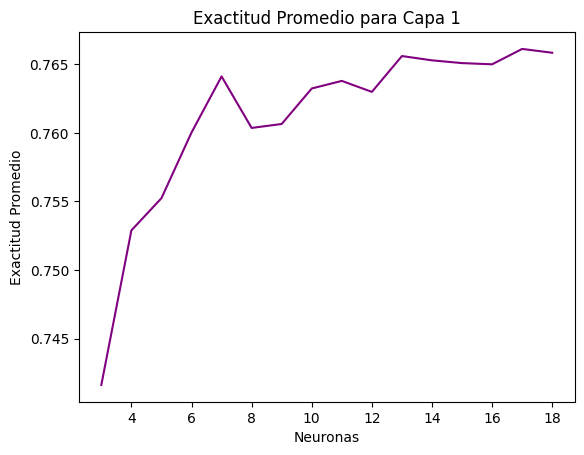

In [ ]:
resultados_capa_1 = capa1

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_1.groupby('Neuronas')['Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Neuronas'], resultados_promedio['Accuracy'], color='purple')
plt.xlabel('Neuronas')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 1')
plt.show()

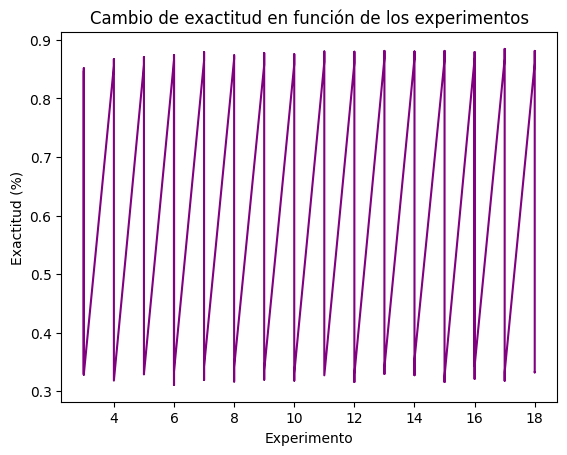

In [ ]:
fig, ax = plt.subplots()
ax.plot(capa1['Neuronas'], capa1['Accuracy'],color = 'purple')
plt.title('Cambio de exactitud en función de los experimentos')
plt.xlabel('Experimento')
plt.ylabel('Exactitud (%)')
plt.show()

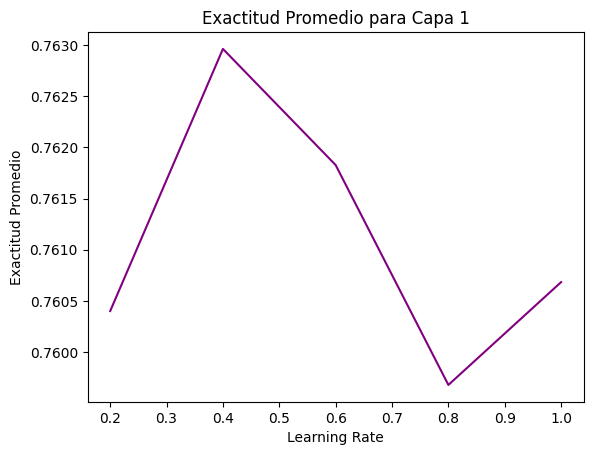

In [ ]:
resultados_capa_1 = capa1

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_1.groupby('Learning Rate')['Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Learning Rate'], resultados_promedio['Accuracy'], color='purple')
plt.xlabel('Learning Rate')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 1')
plt.show()

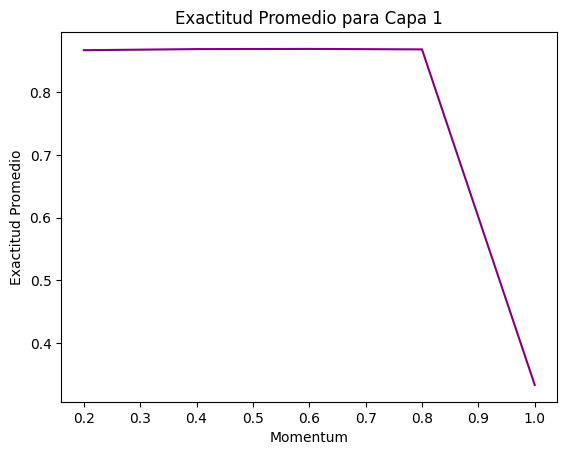

In [ ]:
resultados_capa_1 = capa1

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_1.groupby('Momentum')['Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Momentum'], resultados_promedio['Accuracy'], color='purple')
plt.xlabel('Momentum')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 1')
plt.show()

**Capa 2**

# **Graficas**

In [ ]:
# Renombrar las columnas
nuevos_nombres = {
    'Test Accuracy': 'Exactitud',
    'Momentum': 'Momentum',
    'Learning Rate': 'Learning_Rate',
    'Capas': 'Capas',
    'Neuronas': 'Neuronas'
}

resultados.rename(columns=nuevos_nombres, inplace=True)

resultados.head(5)

Exactitud  Momentum  Learning_Rate  Capas  Neuronas
0      0.824       0.2            0.2      2         3
1      0.816       0.2            0.4      2         3
2      0.783       0.2            0.6      2         3
3      0.789       0.2            0.8      2         3
4      0.807       0.2            1.0      2         3

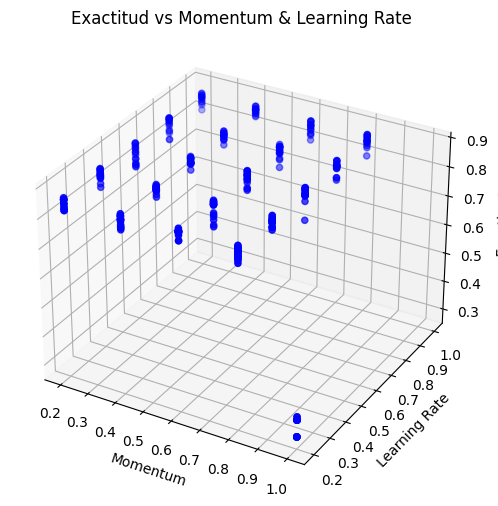

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(resultados['Momentum'], resultados['Learning_Rate'], resultados['Exactitud'], c='b', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Momentum')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Exactitud')

# Título del gráfico
plt.title('Exactitud vs Momentum & Learning Rate')

# Mostrar el gráfico
plt.show()


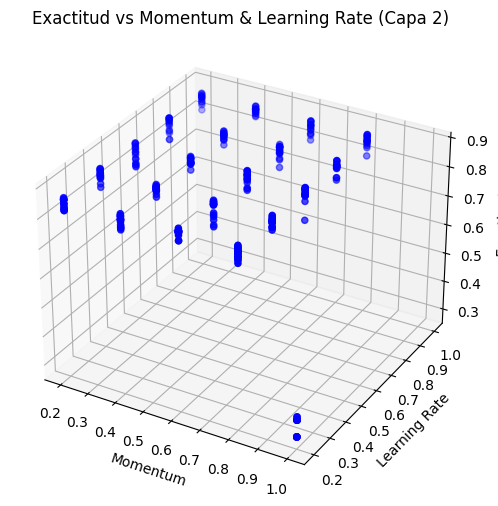

In [ ]:
df_capa_2 = resultados[resultados['Capas'] == 2]


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D para la capa 2
ax.scatter(df_capa_2['Momentum'], df_capa_2['Learning_Rate'], df_capa_2['Exactitud'], c='b', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Momentum')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Exactitud')

# Título del gráfico
plt.title('Exactitud vs Momentum & Learning Rate (Capa 2)')

# Mostrar el gráfico
plt.show()

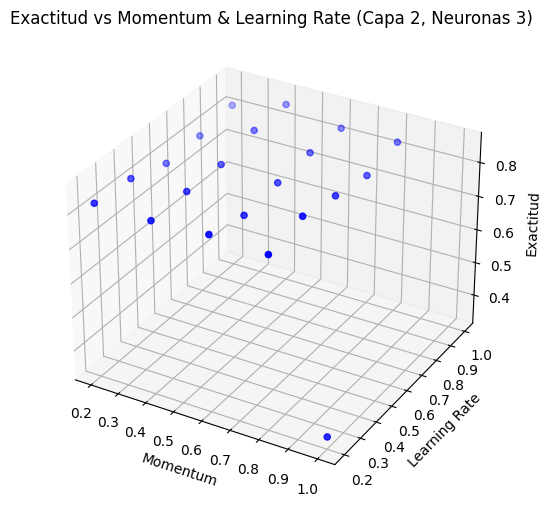

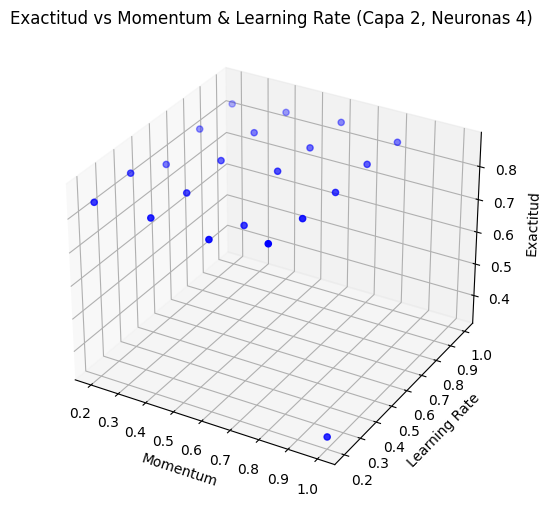

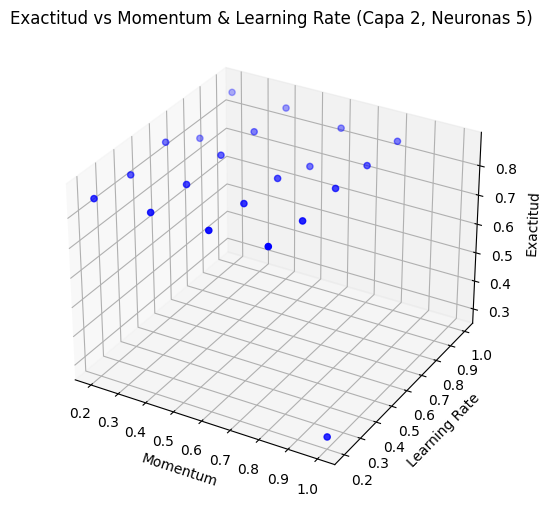

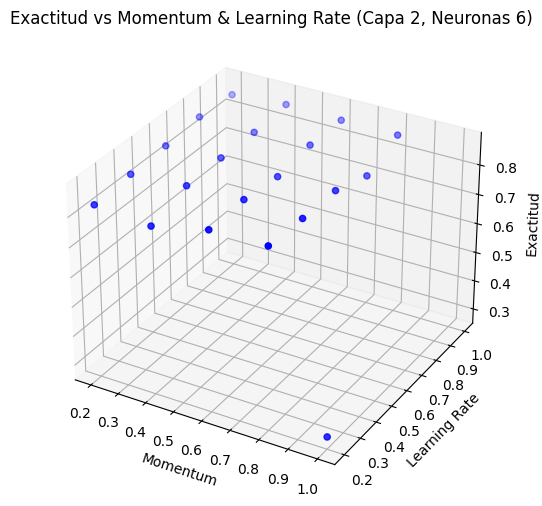

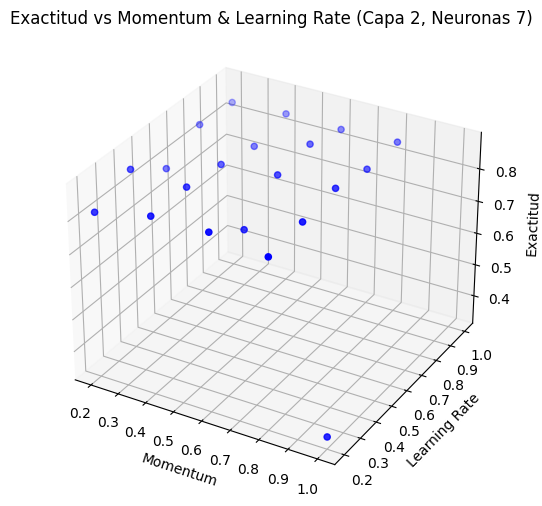

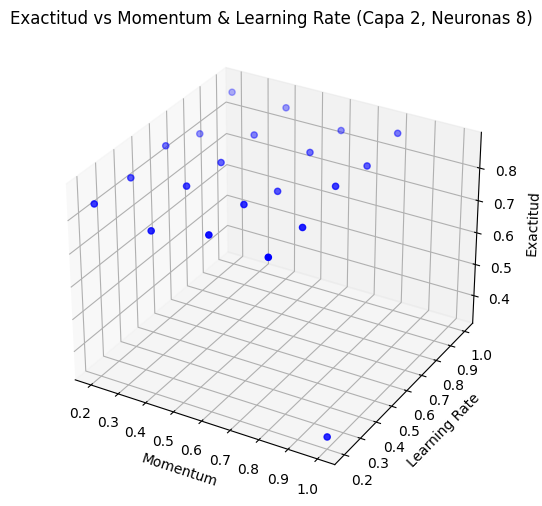

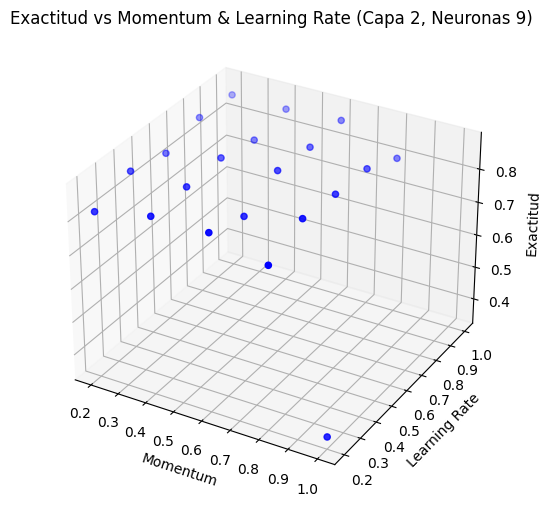

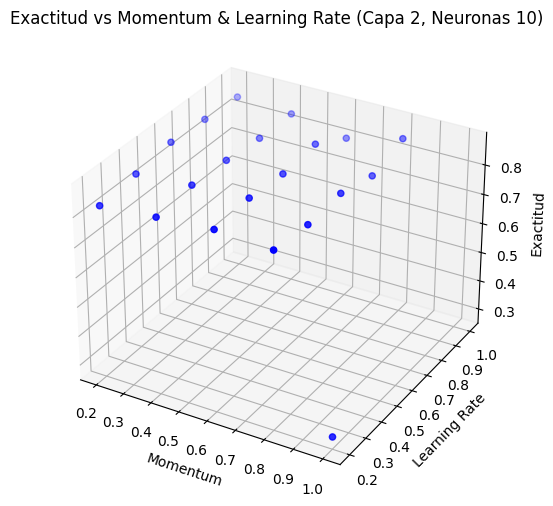

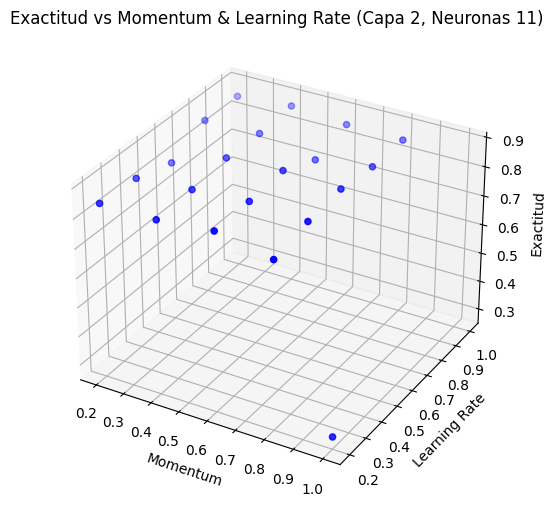

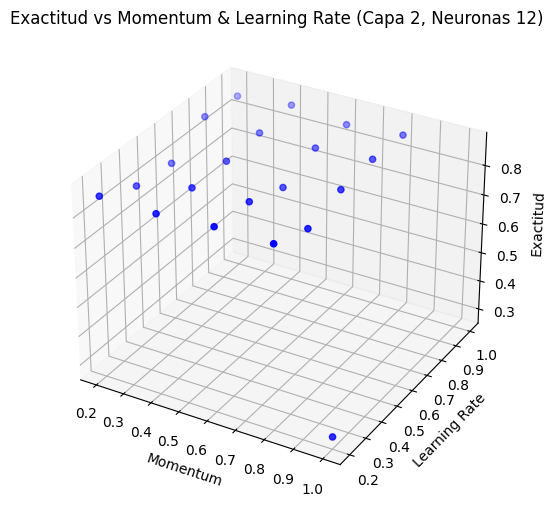

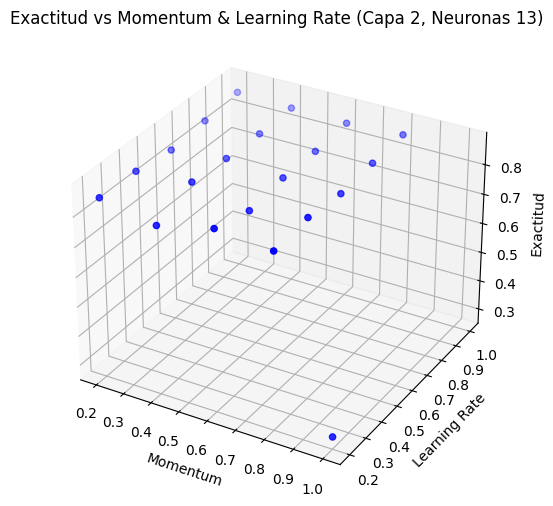

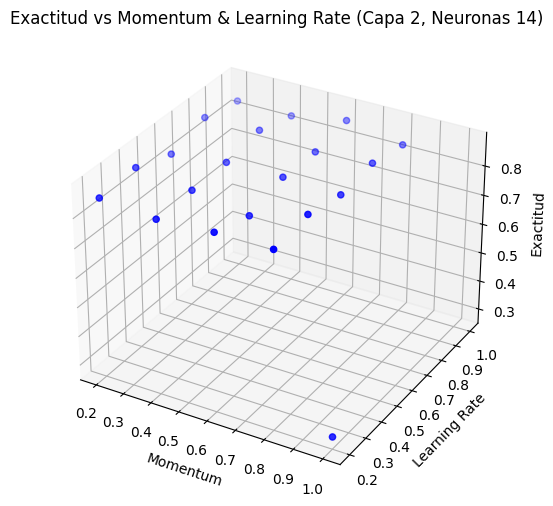

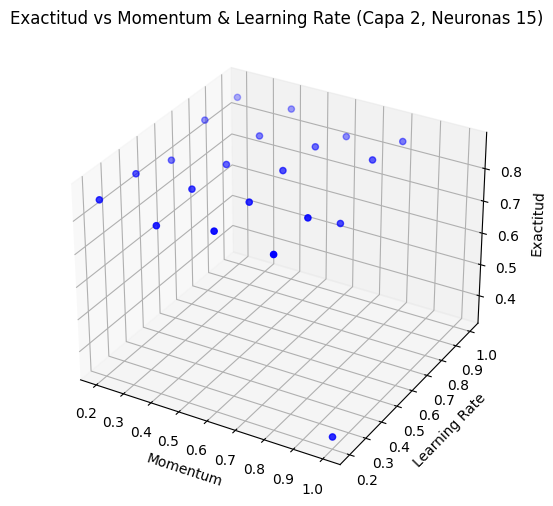

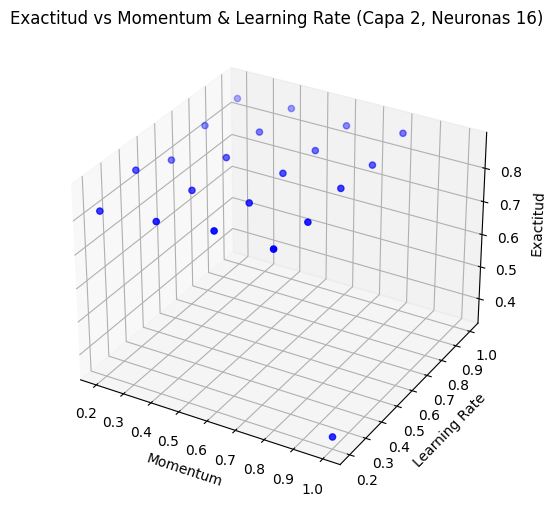

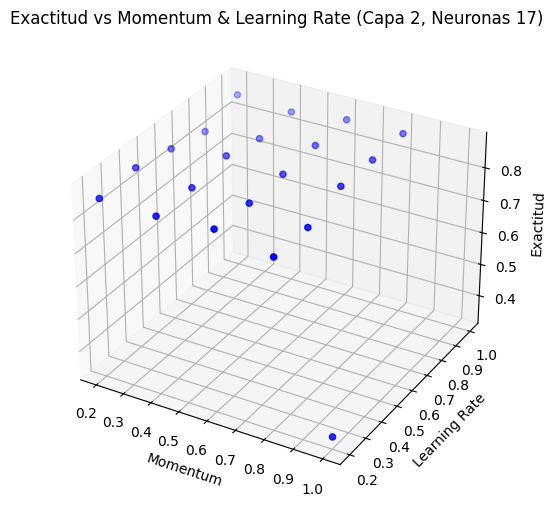

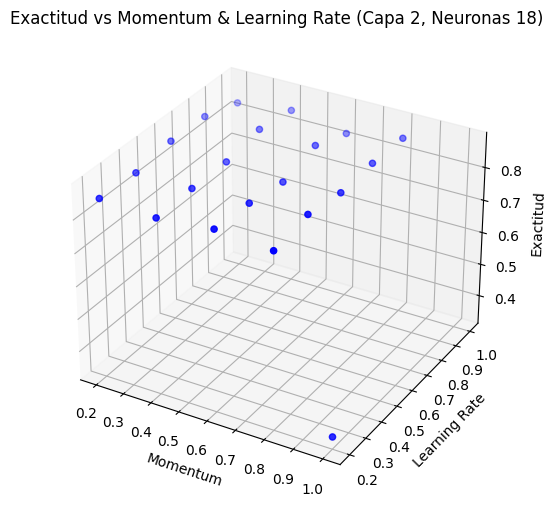

In [ ]:
neuronas_valores_unicos = resultados['Neuronas'].unique()


for neuronas in neuronas_valores_unicos:
    # Filtrar las filas para seleccionar solo las de la capa 2 y el valor actual de neuronas
    df_filtrado = resultados[(resultados['Capas'] == 2) & (resultados['Neuronas'] == neuronas)]

    # Crear una figura y un eje tridimensional
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos en 3D para la capa 2 y el valor actual de neuronas
    ax.scatter(df_filtrado['Momentum'], df_filtrado['Learning_Rate'], df_filtrado['Exactitud'], c='b', marker='o')

    # Etiquetas de los ejes
    ax.set_xlabel('Momentum')
    ax.set_ylabel('Learning Rate')
    ax.set_zlabel('Exactitud')

    # Título del gráfico
    plt.title(f'Exactitud vs Momentum & Learning Rate (Capa 2, Neuronas {neuronas})')

    # Mostrar el gráfico
    plt.show()


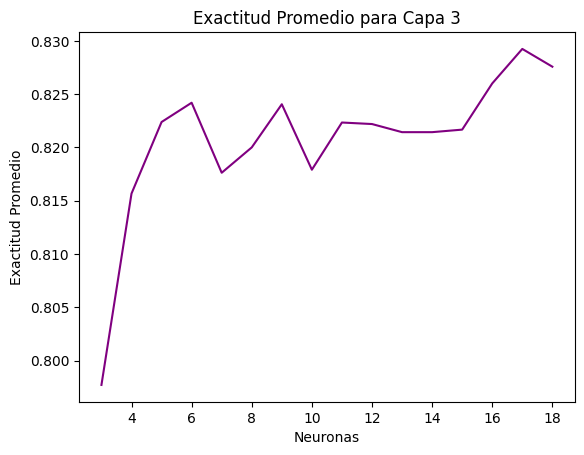

In [ ]:
# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados.groupby('Neuronas')['Exactitud'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Neuronas'], resultados_promedio['Exactitud'], color='purple')
plt.xlabel('Neuronas')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

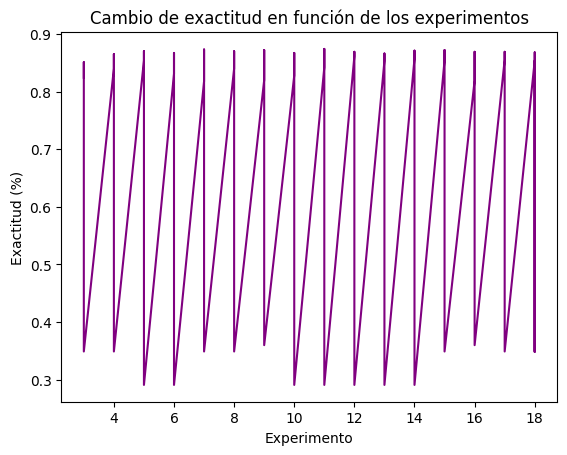

In [ ]:
fig, ax = plt.subplots()
ax.plot(resultados['Neuronas'], resultados['Exactitud'],color = 'purple')
plt.title('Cambio de exactitud en función de los experimentos')
plt.xlabel('Experimento')
plt.ylabel('Exactitud (%)')
plt.show()

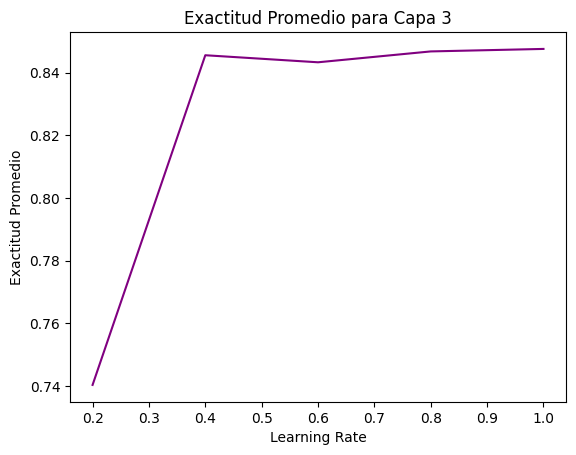

In [ ]:
# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados.groupby('Learning_Rate')['Exactitud'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Learning_Rate'], resultados_promedio['Exactitud'], color='purple')
plt.xlabel('Learning Rate')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

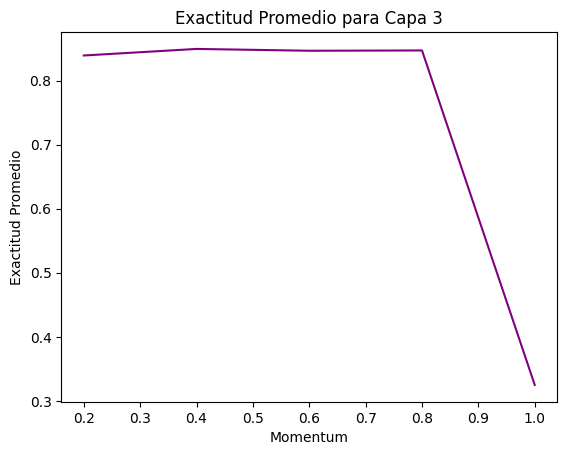

In [ ]:
# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados.groupby('Momentum')['Exactitud'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Momentum'], resultados_promedio['Exactitud'], color='purple')
plt.xlabel('Momentum')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

**Capa 3**

In [ ]:
capa3 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/Resultados_capa3.csv')

In [ ]:
capa3

Test Accuracy  Momentum  Learning Rate  Capas  Neuronas
0         0.708000       0.2            0.2      3         3
1         0.802000       0.2            0.4      3         3
2         0.838000       0.2            0.6      3         3
3         0.797000       0.2            0.8      3         3
4         0.843000       0.2            1.0      3         3
..             ...       ...            ...    ...       ...
363       0.320863       1.0            0.2      3        18
364       0.340268       1.0            0.4      3        18
365       0.344873       1.0            0.6      3        18
366       0.340482       1.0            0.8      3        18
367       0.331874       1.0            1.0      3        18

[368 rows x 5 columns]

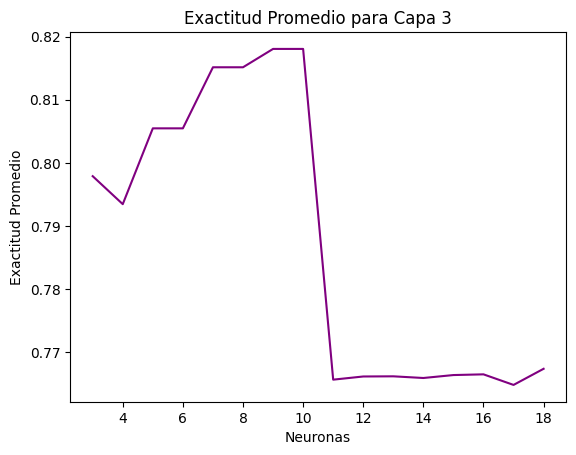

In [ ]:
resultados_capa_3 = capa3

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_3.groupby('Neuronas')['Test Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Neuronas'], resultados_promedio['Test Accuracy'], color='purple')
plt.xlabel('Neuronas')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

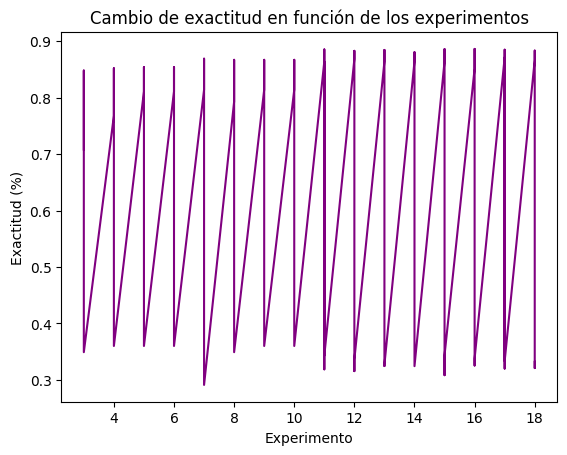

In [ ]:
fig, ax = plt.subplots()
ax.plot(capa3['Neuronas'], capa3['Test Accuracy'],color = 'purple')
plt.title('Cambio de exactitud en función de los experimentos')
plt.xlabel('Experimento')
plt.ylabel('Exactitud (%)')
plt.show()

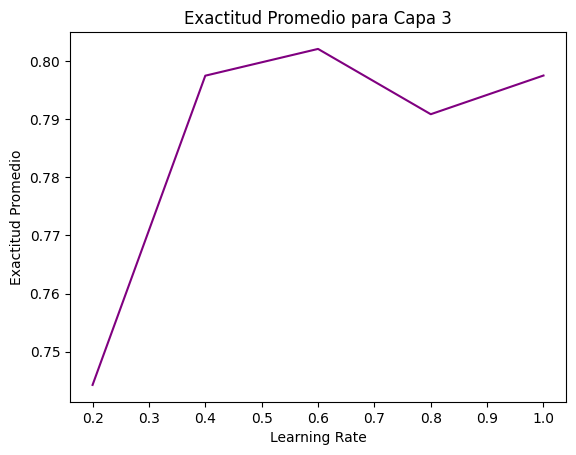

In [ ]:
resultados_capa_3 = capa3

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_3.groupby('Learning Rate')['Test Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Learning Rate'], resultados_promedio['Test Accuracy'], color='purple')
plt.xlabel('Learning Rate')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

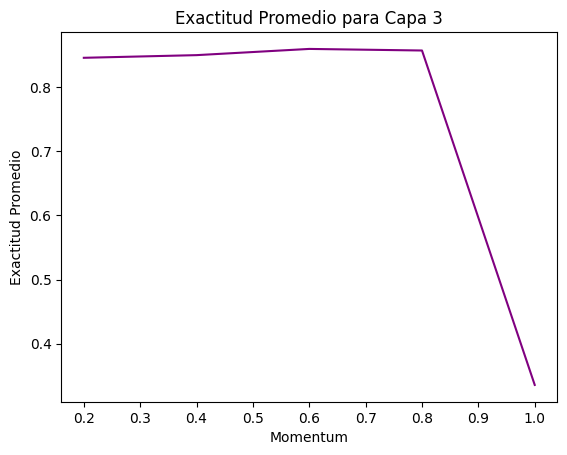

In [ ]:
resultados_capa_3 = capa3

# Calcular el promedio de la exactitud para cada combinación única de parámetros de neuronas
resultados_promedio = resultados_capa_3.groupby('Momentum')['Test Accuracy'].mean().reset_index()

# Graficar
fig, ax = plt.subplots()
ax.plot(resultados_promedio['Momentum'], resultados_promedio['Test Accuracy'], color='purple')
plt.xlabel('Momentum')
plt.ylabel('Exactitud Promedio')
plt.title('Exactitud Promedio para Capa 3')
plt.show()

# **Mejores resultados y graficas**

# **Evaluar los 5 mejores**

**Capa1**

In [ ]:
capa1 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/Resultados_capa1.csv')

In [ ]:
primeros5_capa1 = capa1.nlargest(5, 'Accuracy')
primeros5_capa1

Learning Rate  Momentum  Accuracy  Capas  Neuronas
361            0.4       0.6  0.884711      1        17
362            0.6       0.6  0.881709      1        17
391            0.4       0.8  0.881311      1        18
316            0.4       0.8  0.881310      1        15
259            1.0       0.4  0.881309      1        13

**PARA 0.4	0.6	0.884711	1	17**

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

In [ ]:
resultados5capa1 = pd.DataFrame()
resultados5capa1['Test Accuracy'] = accuracy
resultados5capa1['Momentum'] = 0.6
resultados5capa1['Learning Rate'] = 0.4
resultados5capa1['Capas'] = 1
resultados5capa1['Neuronas'] = 17
resultados5capa1['Loss'] = loss_s

In [ ]:
resultados5capa1.to_csv('resultados5capa1.csv', index=False)
resultados5capa1

Test Accuracy  Momentum  Learning Rate  Capas  Neuronas      Loss
0       0.885311       0.6            0.4      1        17  0.281508

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import KFold
# import tensorflow as tf

# # Definir X e y
# X = data.drop('Clase', axis=1).values
# y = data['Clase'].values

# # Definición del modelo
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# # Compilación del modelo
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.6)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Definir un Callback personalizado para imprimir los valores deseados por época
# class CustomCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         print("\nEpoch:", epoch + 1)
#         print("Accuracy:", logs['accuracy'])
#         print("Learning Rate:", self.model.optimizer.learning_rate.numpy())
#         print("Momentum:", self.model.optimizer.momentum)
#         print("Loss:", logs['loss'])

# # Validación cruzada con k=5
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# fold_scores = []
# loss_scores = []
# for train_index, test_index in kfold.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Entrenamiento del modelo con el Callback personalizado
#     history = model.fit(X_train, y_train, epochs=200, callbacks=[CustomCallback()])

#     # Evaluación del modelo en el conjunto de prueba
#     test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#     fold_scores.append(test_accuracy)
#     loss_scores.append(test_loss)

# average_score = np.mean(fold_scores)
# average_loss = np.mean(loss_scores)

# # Imprimir el promedio de precisión y pérdida
# print("\nAverage Accuracy:", average_score)
# print("Average Loss:", average_loss)



Average Accuracy: 0.8813075184822082
Average Loss: 0.29838533997535704


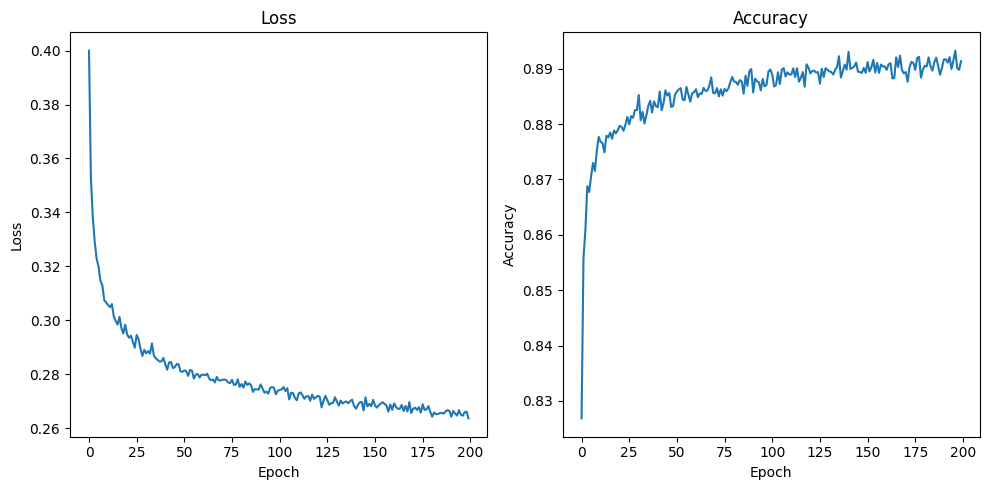

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


**0.6	0.6	0.881709	1	17**

# PRUEBAS

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

In [ ]:
resultados5capa1_2 = pd.DataFrame()
resultados5capa1_2['Test Accuracy'] = accuracy
resultados5capa1_2['Momentum'] = 0.6
resultados5capa1_2['Learning Rate'] = 0.6
resultados5capa1_2['Capas'] = 1
resultados5capa1_2['Neuronas'] = 17
resultados5capa1_2['Loss'] = loss_s

In [ ]:
resultados5capa1_2.to_csv('resultados5capa1_2.csv', index=False)
resultados5capa1_2

Test Accuracy  Momentum  Learning Rate  Capas  Neuronas      Loss
0       0.883312       0.6            0.6      1        17  0.286234


Average Accuracy: 0.8907203197479248
Average Loss: 0.27591274976730346


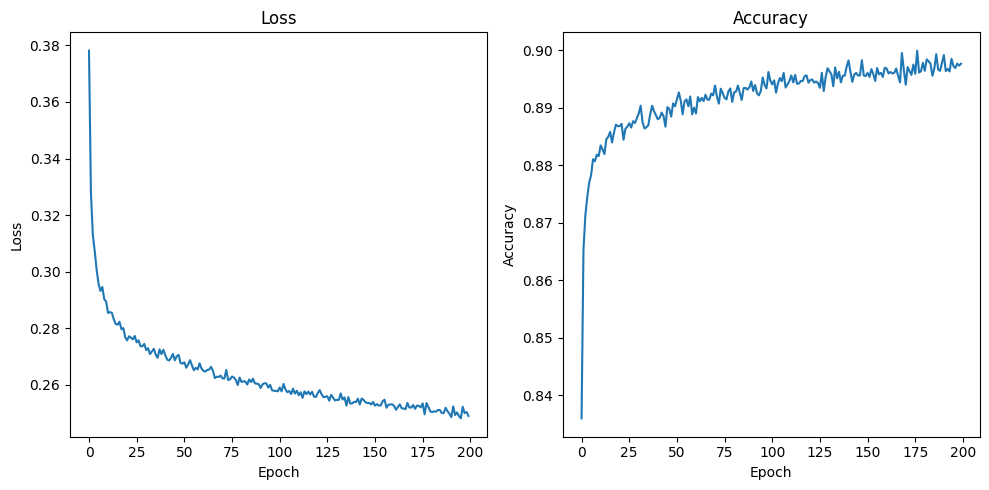

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Para 0.4	0.8	0.881311	1	18**


Average Accuracy: 0.886712121963501
Average Loss: 0.28422786593437194


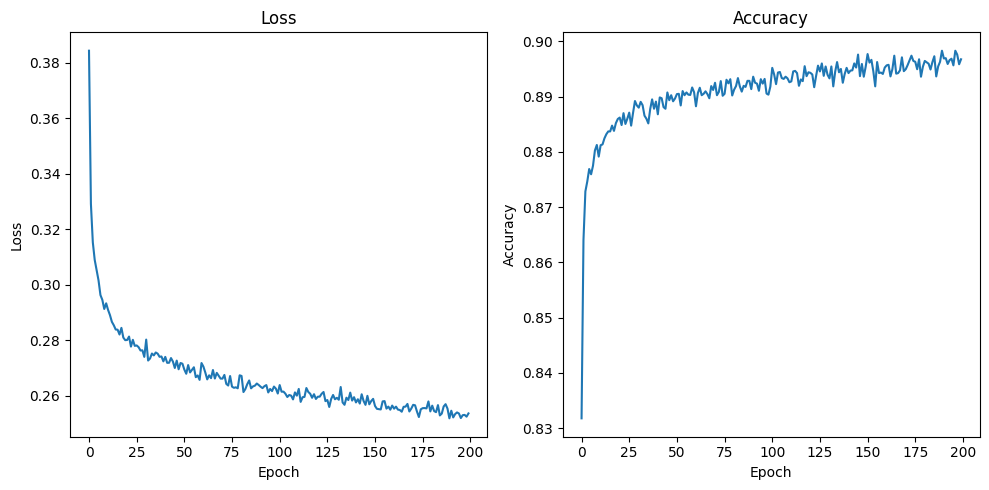

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(18, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa1_3 = pd.DataFrame()
resultados5capa1_3['Test Accuracy'] = accuracy
resultados5capa1_3['Momentum'] = 0.8
resultados5capa1_3['Learning Rate'] = 0.4
resultados5capa1_3['Capas'] = 1
resultados5capa1_3['Neuronas'] = 17
resultados5capa1_3['Loss'] = loss_s

resultados5capa1_3.to_csv('resultados5capa1_3.csv', index=False)
resultados5capa1_3

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(18, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 0.4	0.8	0.881310	1	15**


Average Accuracy: 0.8869149208068847
Average Loss: 0.28459741473197936


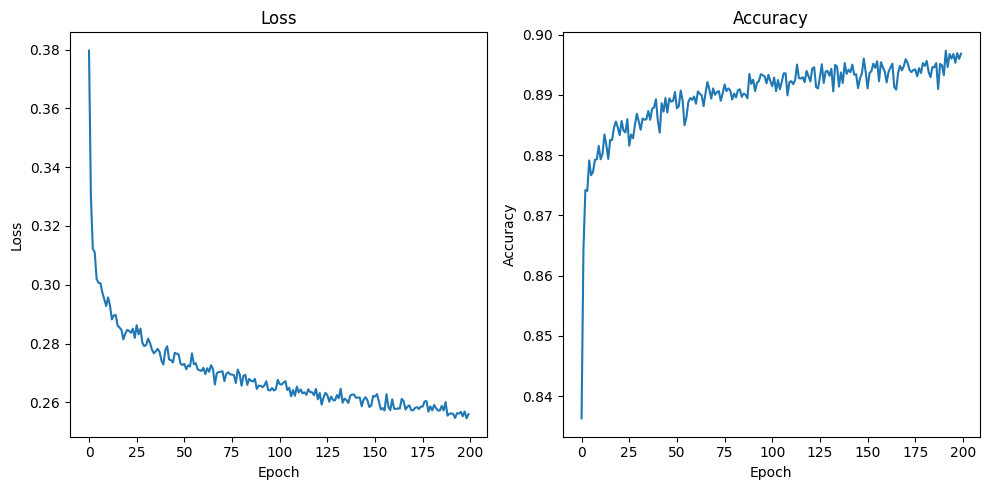

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa1_4 = pd.DataFrame()
resultados5capa1_4['Test Accuracy'] = accuracy
resultados5capa1_4['Momentum'] = 0.8
resultados5capa1_4['Learning Rate'] = 0.4
resultados5capa1_4['Capas'] = 1
resultados5capa1_4['Neuronas'] = 15
resultados5capa1_4['Loss'] = loss_s

resultados5capa1_4.to_csv('resultados5capa1_4.csv', index=False)
resultados5capa1_4

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 1.0	0.4	0.881309	1	13**


Average Accuracy: 0.8813071131706238
Average Loss: 0.29285725951194763


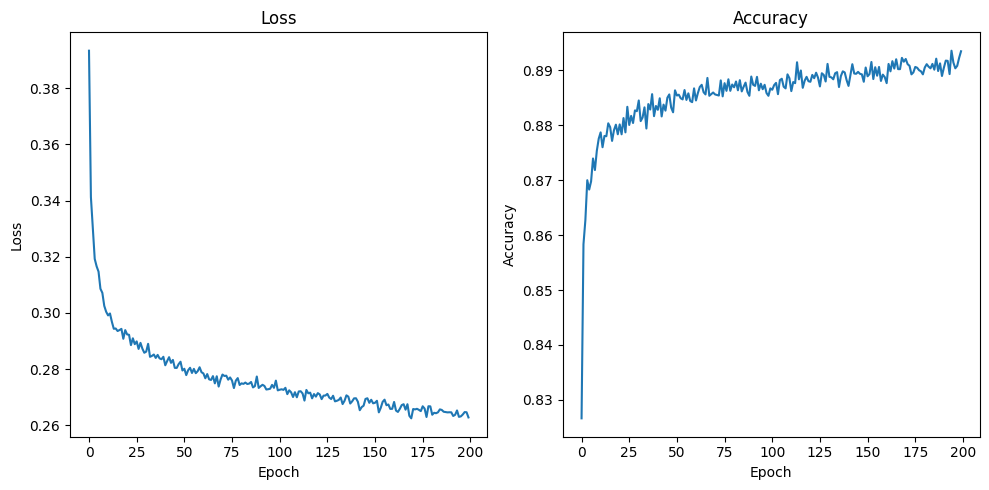

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1, momentum=0.4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa1_5 = pd.DataFrame()
resultados5capa1_5['Test Accuracy'] = accuracy
resultados5capa1_5['Momentum'] = 0.4
resultados5capa1_5['Learning Rate'] = 1
resultados5capa1_5['Capas'] = 1
resultados5capa1_5['Neuronas'] = 13
resultados5capa1_5['Loss'] = loss_s

resultados5capa1_5.to_csv('resultados5capa1_5.csv', index=False)
resultados5capa1_5

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=1, momentum=0.4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Extraemos las mejores

In [ ]:

df_ordenado = resultados.sort_values(by='Exactitud', ascending=False)

# Extraer las tres primeras filas
top_5_filas = df_ordenado.head(5)

print(top_5_filas)

     Exactitud  Momentum  Learning_Rate  Capas  Neuronas
180      0.874       0.6            0.6      2        11
97       0.873       0.6            0.8      2         7
138      0.872       0.6            0.6      2         9
264      0.872       0.6            0.6      2        15
247      0.871       0.8            0.4      2        14


In [ ]:
primeros5_capa1 = resultados.nlargest(5, 'Exactitud')
primeros5_capa1

Exactitud  Momentum  Learning_Rate  Capas  Neuronas
180      0.874       0.6            0.6      2        11
97       0.873       0.6            0.8      2         7
138      0.872       0.6            0.6      2         9
264      0.872       0.6            0.6      2        15
247      0.871       0.8            0.4      2        14

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf

# Definir X e y
X = data.drop('Clase', axis=1).values
y = data['Clase'].values

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir un Callback personalizado para imprimir los valores deseados por época
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nEpoch:", epoch + 1)
        print("Accuracy:", logs['accuracy'])
        print("Learning Rate:", self.model.optimizer.learning_rate.numpy())
        print("Momentum:", self.model.optimizer.momentum)
        print("Loss:", logs['loss'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo con el Callback personalizado
    history = model.fit(X_train, y_train, epochs=50, callbacks=[CustomCallback()])

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)


Epoch 1/50
116/125 [==========================>...] - ETA: 0s - loss: 1.0868 - accuracy: 0.3877
Epoch: 1
Accuracy: 0.39839839935302734
Learning Rate: 0.6
Momentum: 0.6
Loss: 1.0751078128814697
125/125 [==============================] - 3s 3ms/step - loss: 1.0751 - accuracy: 0.3984
Epoch 2/50
123/125 [============================>.] - ETA: 0s - loss: 0.7444 - accuracy: 0.6606
Epoch: 2
Accuracy: 0.6609109044075012
Learning Rate: 0.6
Momentum: 0.6
Loss: 0.7437751889228821
125/125 [==============================] - 0s 3ms/step - loss: 0.7438 - accuracy: 0.6609
Epoch 3/50
118/125 [===========================>..] - ETA: 0s - loss: 0.6212 - accuracy: 0.7391
Epoch: 3
Accuracy: 0.7412412166595459
Learning Rate: 0.6
Momentum: 0.6
Loss: 0.6190279722213745
125/125 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.7412
Epoch 4/50
119/125 [===========================>..] - ETA: 0s - loss: 0.5261 - accuracy: 0.7878
Epoch: 4
Accuracy: 0.7897897958755493
Learning Rate: 0.6
Mom

In [ ]:
mapeo_clases = {'Incendio': 0, 'Humo_gris': 1, 'No_Incendio': 2}

# Aplicar el mapeo a la columna 'Clase'
data['Clase'] = data['Clase'].map(mapeo_clases)

data.head(5)

Rojo     Verde      Azul  Promedio Total RGB  \
0  0.214101  0.483245  0.828876            0.579546   
1  0.242429  0.522092  0.833845            0.608007   
2  0.354758  0.708576  0.931645            0.765758   
3  0.431283  0.872784  0.971152            0.875993   
4  0.270560  0.427342  0.656735            0.509741   

   Promedio Total Desviación Std  Promedio Total HSV  Promedio de color  \
0                       0.265594            0.591681           0.639752   
1                       0.229589            0.579555           0.671960   
2                       0.264592            0.589450           0.851449   
3                       0.350297            0.589625           0.988647   
4                       0.435994            0.436718           0.544599   

   Área total de los contornos  Luminosidad promedio  Promedio Total LAB  \
0                     0.658163              0.639752            0.811787   
1                     0.732143              0.671960            0.814596   
2                     0.994898              0.851449            0.908642   
3                     0.946429              0.988647            0.971072   
4                     0.267857              0.544599            0.619481   

   Frecuencia LBP  Mean Spectrum  Std Spectrum  Skewness Spectrum  \
0        0.142180       0.761863      0.120393           0.663454   
1        0.203791       0.723715      0.149830           0.667020   
2        0.132701       0.746906      0.120693           0.706623   
3        0.236967       0.789051      0.126715           0.673517   
4        0.099526       0.786329      0.141523           0.681497   

   Kurtosis Spectrum  Edge Density  Clase  
0           0.050483      0.382353      0  
1           0.038060      0.303922      0  
2           0.056364      0.205882      0  
3           0.059984      0.245098      0  
4           0.030055      0.588235      0

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf

X = data.drop('Clase', axis=1).values
y = data['Clase'].values

# Define the model outside the loop
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Get the initial weights of the model
initial_weights = model.get_weights()

# Validation with k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_per_epoch = []
accuracy_per_epoch = []

for train_index, test_index in kfold.split(X):
    # Reset model weights
    model.set_weights(initial_weights)

    # Compile the model with the optimizer SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callback to save loss and accuracy per epoch
    class LossAccuracyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            loss_per_epoch.append(logs['loss'])
            accuracy_per_epoch.append(logs['accuracy'])

    # Train the model on the current fold
    history = model.fit(X[train_index], y[train_index], epochs=200, callbacks=[LossAccuracyCallback()], verbose=0)

    # Evaluate the model on the current fold
    test_loss, test_accuracy = model.evaluate(X[test_index], y[test_index], verbose=0)
    fold_scores.append(test_accuracy)

    # Print the test accuracy for each fold
    print("Test Accuracy: {:.4f}".format(test_accuracy))

# Print average test accuracy
print("Average Test Accuracy:", np.mean(fold_scores))

# Save loss and accuracy per epoch
print("Loss per epoch:", loss_per_epoch)
print("Accuracy per epoch:", accuracy_per_epoch)


Test Accuracy: 0.8530
Test Accuracy: 0.8358
Test Accuracy: 0.8539
Test Accuracy: 0.8659
Test Accuracy: 0.8609
Average Test Accuracy: 0.8538832902908325
Loss per epoch: [1.074415922164917, 0.886777937412262, 0.7907088398933411, 0.7430355548858643, 0.6303777098655701, 0.5469239950180054, 0.503967821598053, 0.49037235975265503, 0.45460617542266846, 0.45475196838378906, 0.4496864676475525, 0.4404371678829193, 0.41793861985206604, 0.4213514029979706, 0.4113697409629822, 0.4202798306941986, 0.40714597702026367, 0.3962540924549103, 0.397142231464386, 0.3987864553928375, 0.39988580346107483, 0.3957938551902771, 0.3921810984611511, 0.3870770037174225, 0.3904094398021698, 0.39378830790519714, 0.3895718455314636, 0.40354296565055847, 0.3854890763759613, 0.3913346529006958, 0.383863240480423, 0.38117554783821106, 0.38666293025016785, 0.3890347182750702, 0.3835993707180023, 0.3825201094150543, 0.3795449137687683, 0.38559576869010925, 0.3929985463619232, 0.3855968415737152, 0.37929239869117737, 0.37

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf

X = data.drop('Clase', axis=1).values
y = data['Clase'].values

# Define the model outside the loop
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Get the initial weights of the model
initial_weights = model.get_weights()

# Validation with k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_per_epoch = []
accuracy_per_epoch = []

for train_index, test_index in kfold.split(X):
    # Reset model weights
    model.set_weights(initial_weights)

    # Compile the model with the optimizer SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callback to save loss and accuracy per epoch
    class LossAccuracyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            loss_per_epoch.append(logs['loss'])
            accuracy_per_epoch.append(logs['accuracy'])

    # Train the model on the current fold
    history = model.fit(X[train_index], y[train_index], epochs=200, callbacks=[LossAccuracyCallback()], verbose=0)

    # Evaluate the model on the current fold
    test_loss, test_accuracy = model.evaluate(X[test_index], y[test_index], verbose=0)
    fold_scores.append(test_accuracy)

    # Print the test accuracy for each fold
    print("Test Accuracy: {:.4f}".format(test_accuracy))

# Print average test accuracy
print("Average Test Accuracy:", np.mean(fold_scores))

# Save average loss and accuracy per epoch
avg_loss_per_epoch = np.mean(np.array(loss_per_epoch).reshape(-1, 200), axis=0)
avg_accuracy_per_epoch = np.mean(np.array(accuracy_per_epoch).reshape(-1, 200), axis=0)
print("Average Loss per epoch:", avg_loss_per_epoch)
print("Average Accuracy per epoch:", avg_accuracy_per_epoch)


Test Accuracy: 0.8120
Test Accuracy: 0.8739
Test Accuracy: 0.8779
Test Accuracy: 0.8959
Test Accuracy: 0.8839
Average Test Accuracy: 0.8687063097953797
Average Loss per epoch: [1.03727891 0.72321953 0.59398032 0.5350044  0.49955549 0.47815502
 0.47001777 0.44541138 0.43244966 0.41922078 0.41419014 0.40311786
 0.39544981 0.39811401 0.39259149 0.38585883 0.38711591 0.38303837
 0.37915052 0.37360863 0.37353414 0.3728386  0.36656111 0.36476262
 0.36150151 0.35765912 0.35828282 0.35129939 0.35338172 0.35143647
 0.35102864 0.35061115 0.34599949 0.34512472 0.34596266 0.34055755
 0.34271922 0.33757733 0.34161299 0.33563064 0.33609526 0.33329595
 0.33346702 0.3320191  0.32888899 0.32964054 0.32832534 0.32711864
 0.32597933 0.32211735 0.32197475 0.32795873 0.32241191 0.3200035
 0.31898764 0.32099926 0.32274835 0.32074179 0.31860204 0.31810354
 0.31648885 0.31735138 0.31115726 0.31272313 0.31668217 0.30806368
 0.31313522 0.30924684 0.31298025 0.30750501 0.30879687 0.30550553
 0.30703875 0.3116723

# Pruebas

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

l_r=0.6
m=0.6
Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

In [ ]:
resultados5capa2 = pd.DataFrame()
resultados5capa2['Test Accuracy'] = accuracy
resultados5capa2['Momentum'] = 0.6
resultados5capa2['Learning Rate'] = 0.4
resultados5capa2['Capas'] = 2
resultados5capa2['Neuronas'] = 11
resultados5capa2['Loss'] = loss_s


Average Accuracy: 0.8915175199508667
Average Loss: 0.26906087100505827


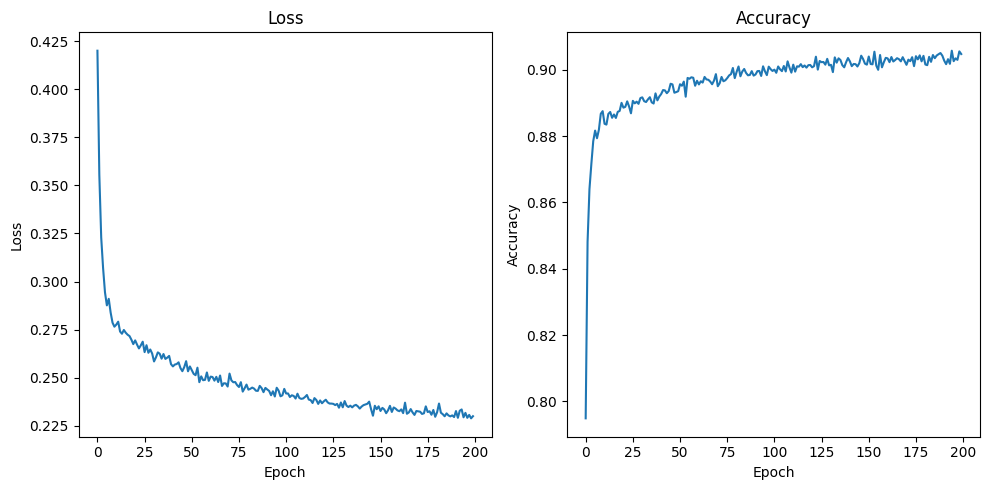

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.8, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

l_r=0.8
m=0.6
Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)


Average Accuracy: 0.8737023115158081
Average Loss: 0.3127499997615814


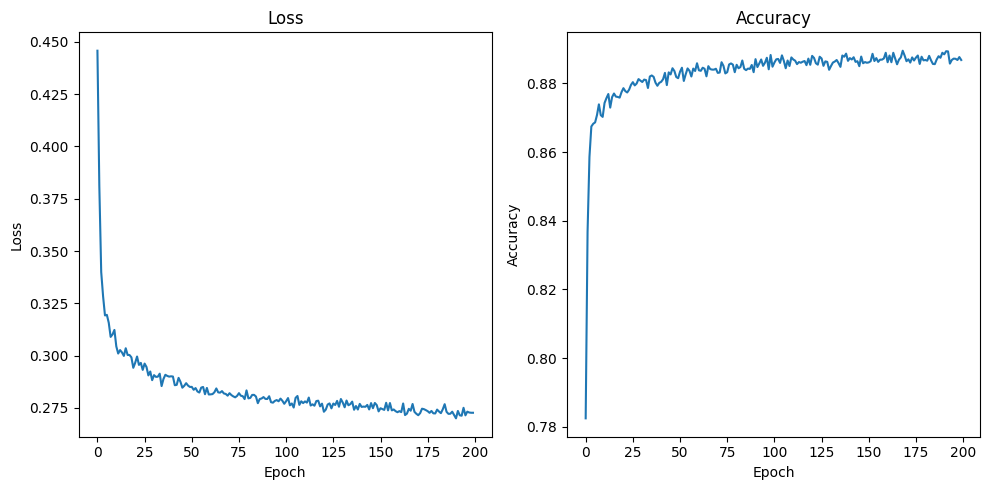

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(7, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.8, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
resultados5capa2_2 = pd.DataFrame()
resultados5capa2_2['Test Accuracy'] = accuracy
resultados5capa2_2['Momentum'] = 0.6
resultados5capa2_2['Learning Rate'] = 0.8
resultados5capa2_2['Capas'] = 2
resultados5capa2_2['Neuronas'] = 7
resultados5capa2_2['Loss'] = loss_s


Average Accuracy: 0.8847109198570251
Average Loss: 0.2832247197628021


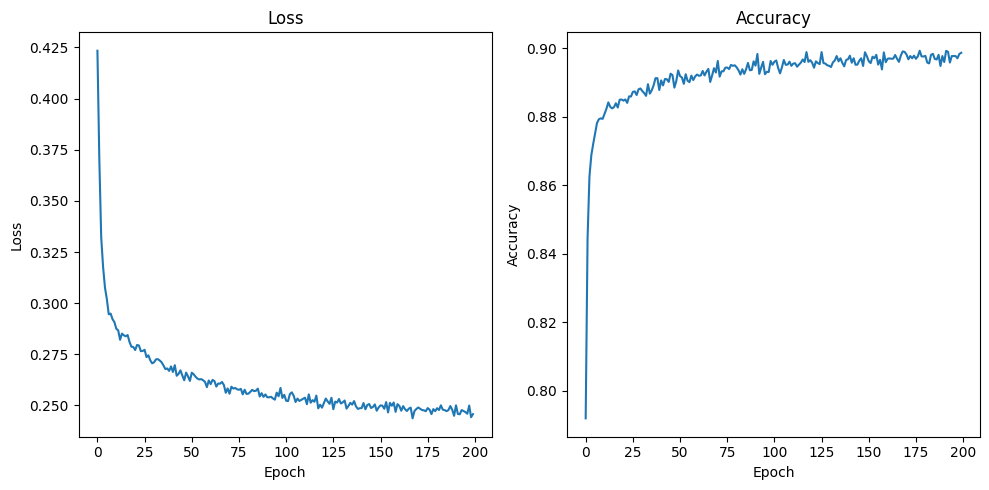

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(9, activation='sigmoid'),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa2_3 = pd.DataFrame()
resultados5capa2_3['Test Accuracy'] = accuracy
resultados5capa2_3['Momentum'] = 0.6
resultados5capa2_3['Learning Rate'] = 0.6
resultados5capa2_3['Capas'] = 2
resultados5capa2_3['Neuronas'] = 9
resultados5capa2_3['Loss'] = loss_s

resultados5capa2_3.to_csv('resultados5capa1_4.csv', index=False)
resultados5capa2_3

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(9, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Average Accuracy: 0.8865125179290771
Average Loss: 0.27894247472286227


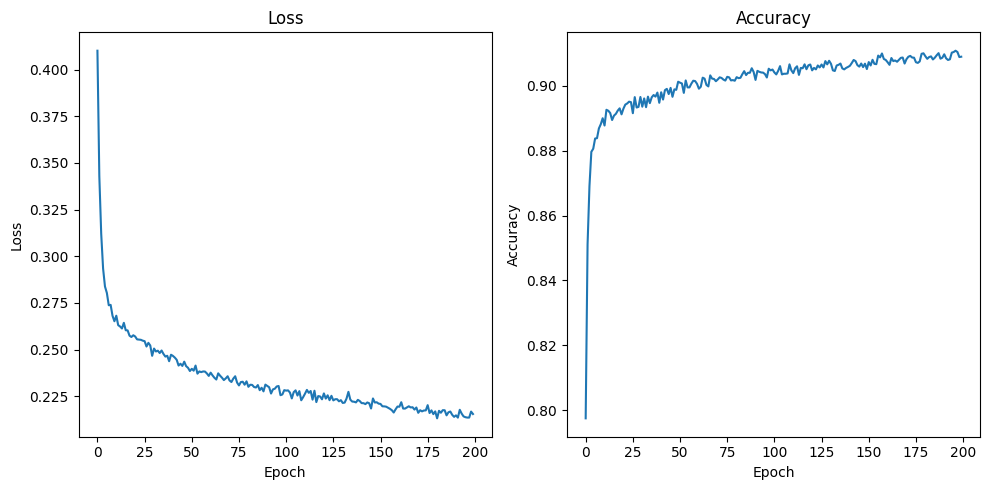

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa2_4 = pd.DataFrame()
resultados5capa2_4['Test Accuracy'] = accuracy
resultados5capa2_4['Momentum'] = 0.6
resultados5capa2_4['Learning Rate'] = 0.6
resultados5capa2_4['Capas'] = 2
resultados5capa2_4['Neuronas'] = 15
resultados5capa2_4['Loss'] = loss_s

resultados5capa2_4.to_csv('resultados5capa1_4.csv', index=False)
resultados5capa2_4

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Average Accuracy: 0.8935195207595825
Average Loss: 0.2789177417755127


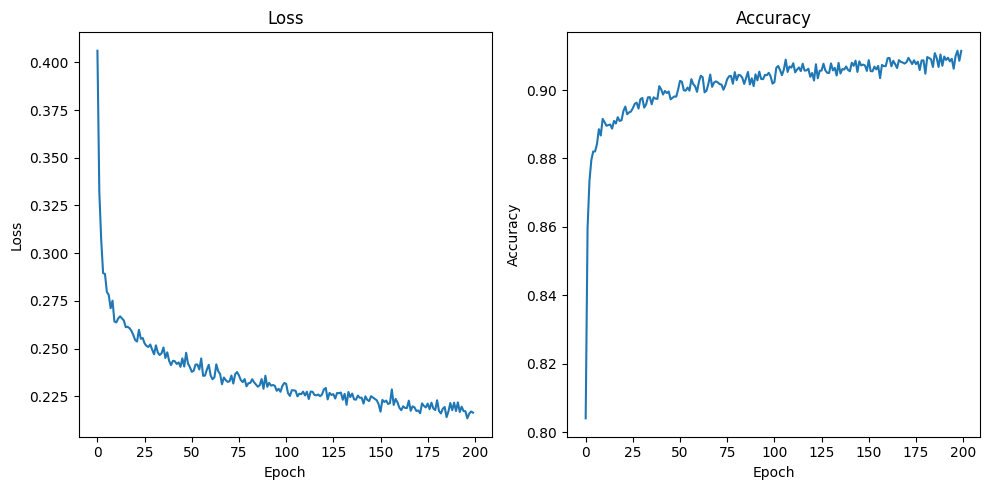

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(14, activation='sigmoid'),
    # tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa2_5 = pd.DataFrame()
resultados5capa2_5['Test Accuracy'] = accuracy
resultados5capa2_5['Momentum'] = 0.8
resultados5capa2_5['Learning Rate'] = 0.4
resultados5capa2_5['Capas'] = 2
resultados5capa2_5['Neuronas'] = 14
resultados5capa2_5['Loss'] = loss_s

resultados5capa2_5.to_csv('resultados5capa1_4.csv', index=False)
resultados5capa2_5

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(14, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# PRUEBAS

**Para 0.886316	0.6	0.6	3	16**

In [ ]:
X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

In [ ]:
resultados5capa3_1 = pd.DataFrame()
resultados5capa3_1['Test Accuracy'] = accuracy
resultados5capa3_1['Momentum'] = 0.6
resultados5capa3_1['Learning Rate'] = 0.6
resultados5capa3_1['Capas'] = 3
resultados5capa3_1['Neuronas'] = 16
resultados5capa3_1['Loss'] = loss_s

In [ ]:
resultados5capa3_1.to_csv('resultados5capa3_1.csv', index=False)
resultados5capa3_1

Test Accuracy  Momentum  Learning Rate  Capas  Neuronas      Loss
0       0.887317       0.6            0.6      3        16  0.291617


Average Accuracy: 0.8911163210868835
Average Loss: 0.28651278018951415


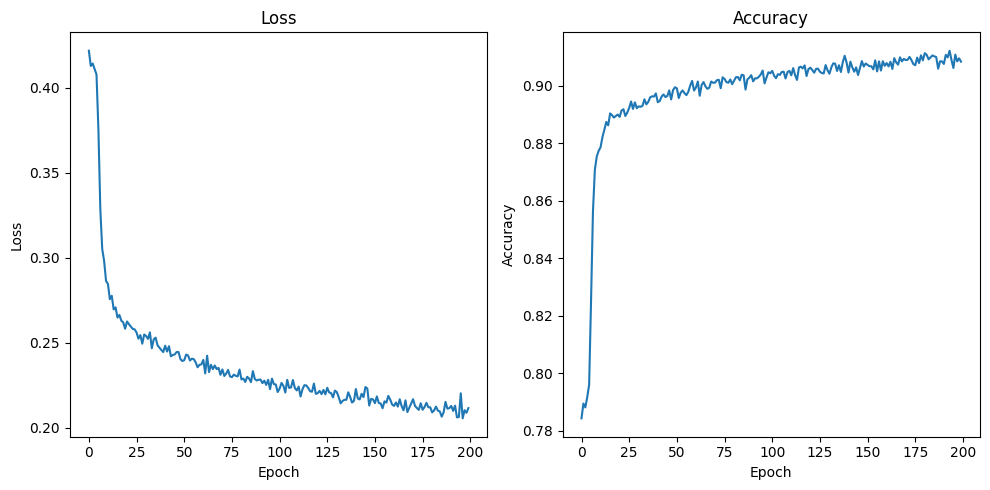

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 0.885913	0.8	0.8	3	15**


Average Accuracy: 0.8881141185760498
Average Loss: 0.2994754374027252


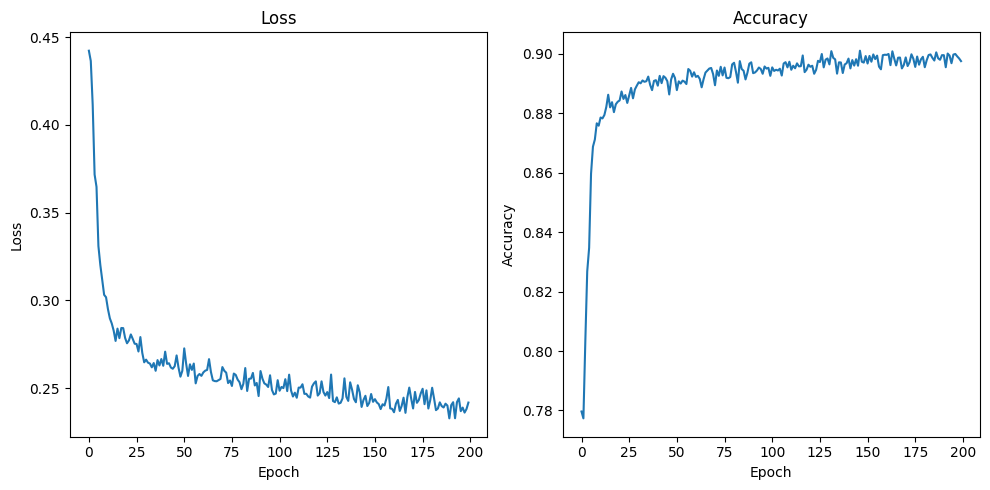

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.8, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa3_2 = pd.DataFrame()
resultados5capa3_2['Test Accuracy'] = accuracy
resultados5capa3_2['Momentum'] = 0.8
resultados5capa3_2['Learning Rate'] = 0.8
resultados5capa3_2['Capas'] = 3
resultados5capa3_2['Neuronas'] = 15
resultados5capa3_2['Loss'] = loss_s

resultados5capa3_2.to_csv('resultados5capa3_2.csv', index=False)
resultados5capa3_2

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(15, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.8, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 0.885314	0.8	0.2	3	11**


Average Accuracy: 0.8879157185554505
Average Loss: 0.2963647782802582


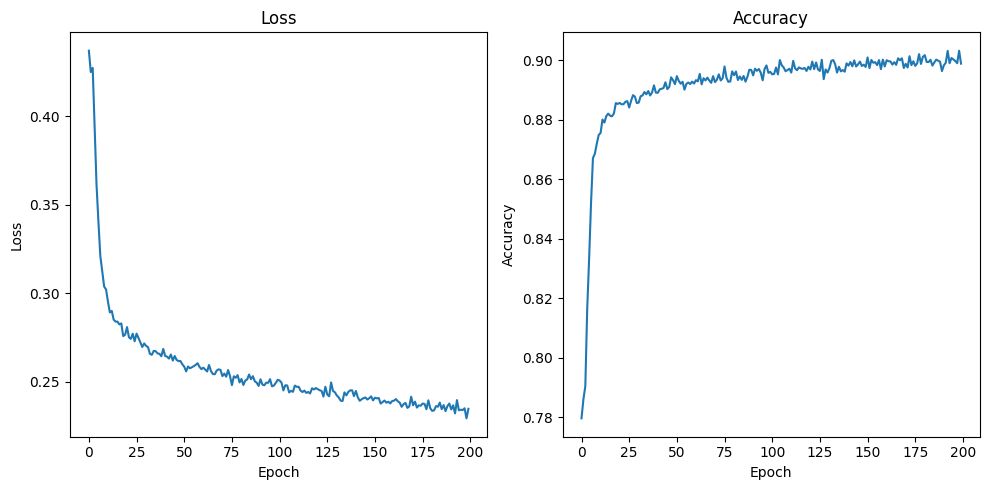

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa3_3 = pd.DataFrame()
resultados5capa3_3['Test Accuracy'] = accuracy
resultados5capa3_3['Momentum'] = 0.8
resultados5capa3_3['Learning Rate'] = 0.2
resultados5capa3_3['Capas'] = 3
resultados5capa3_3['Neuronas'] = 11
resultados5capa3_3['Loss'] = loss_s

resultados5capa3_3.to_csv('resultados5capa3_3.csv', index=False)
resultados5capa3_3

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(11, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 0.884913	0.8	0.4	3	17**


Average Accuracy: 0.8889175176620483
Average Loss: 0.2868919730186462


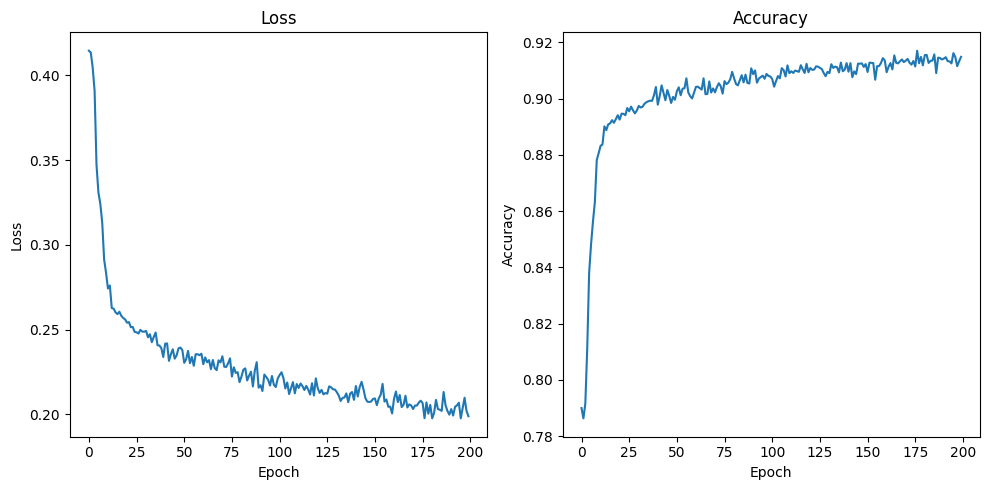

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa3_4 = pd.DataFrame()
resultados5capa3_4['Test Accuracy'] = accuracy
resultados5capa3_4['Momentum'] = 0.8
resultados5capa3_4['Learning Rate'] = 0.4
resultados5capa3_4['Capas'] = 3
resultados5capa3_4['Neuronas'] = 17
resultados5capa3_4['Loss'] = loss_s

resultados5capa3_4.to_csv('resultados5capa3_4.csv', index=False)
resultados5capa3_4

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(17, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.8)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**para 0.884515	0.6	1.0	3	13**

In [ ]:
# PRUEBAS

X = data.drop('Clase', axis=1).values
y = data['Clase'].values
results = []
Learning_rate = []
momentum = []
accuracy = []
loss_s = []

import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

Learning_rate.append(l_r)
momentum.append(m)
accuracy.append(average_score)
loss_s.append(average_loss)
# results.append({'Learning Rate': l_r, 'Momentum': m, 'Average Accuracy': average_score, 'Average Loss': average_loss})

# results_df = pd.DataFrame(results)

resultados5capa3_5 = pd.DataFrame()
resultados5capa3_5['Test Accuracy'] = accuracy
resultados5capa3_5['Momentum'] = 0.6
resultados5capa3_5['Learning Rate'] = 1
resultados5capa3_5['Capas'] = 3
resultados5capa3_5['Neuronas'] = 13
resultados5capa3_5['Loss'] = loss_s

resultados5capa3_5.to_csv('resultados5capa3_5.csv', index=False)
resultados5capa3_5

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt

# Definición del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(13, activation='sigmoid', input_shape=(16,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compilación del modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=1, momentum=0.6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Validación cruzada con k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
loss_scores = []

# Listas para almacenar las pérdidas y precisión de todos los pliegues
all_losses = []
all_accuracies = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=200, verbose=0)

    # Evaluación del modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_scores.append(test_accuracy)
    loss_scores.append(test_loss)

    # Guardar las pérdidas y precisión de este pliegue
    all_losses.append(history.history['loss'])
    all_accuracies.append(history.history['accuracy'])

average_score = np.mean(fold_scores)
average_loss = np.mean(loss_scores)

# Imprimir el promedio de precisión y pérdida
print("\nAverage Accuracy:", average_score)
print("Average Loss:", average_loss)

avg_loss = np.mean(all_losses, axis=0)
avg_accuracy = np.mean(all_accuracies, axis=0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(avg_accuracy)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Juntar todo**

In [ ]:
capa1_1 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa1.csv')
capa1_2 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa1_2.csv')
capa1_3 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa1_3.csv')
capa1_4 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa1_4.csv')
capa1_5 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa1_5.csv')
capa3_1 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa3_1.csv')
capa3_2 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa3_2.csv')
capa3_3 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa3_3.csv')
capa3_4 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa3_4.csv')
capa3_5 = pd.read_csv('/content/drive/MyDrive/ArchivosColab/resultados5capa3_5.csv')

In [ ]:
Resultados5_capa = pd.concat([capa1_1,capa1_2,capa1_3,capa1_4,capa1_5,capa3_1,capa3_2,capa3_3,capa3_4,capa3_5 ])


In [ ]:
Resultados5_capa

Test Accuracy  Momentum  Learning Rate  Capas  Neuronas      Loss
0       0.883313       0.6            0.6      1        16  0.295141
1       0.886515       0.6            0.6      1        16  0.287572
0       0.883312       0.6            0.6      1        17  0.286234
0       0.881711       0.8            0.4      1        17  0.284564
0       0.887914       0.8            0.4      1        15  0.282578
0       0.884711       0.4            1.0      1        13  0.288553
0       0.887317       0.6            0.6      3        16  0.291617
0       0.889517       0.8            0.8      3        15  0.306078
0       0.895120       0.8            0.2      3        11  0.272508
0       0.887716       0.8            0.4      3        17  0.292921
0       0.884910       0.6            1.0      3        13  0.309538

In [ ]:
#exporta a csv
Resultados5_capa.to_csv( "Resultados5_capa.csv", index=False, encoding='utf-8-sig')